# **E-Commerce Customer Churn Analysis and Prediction**



# 1 - FRAMING THE PROBLEM

In this analysis, we explore a problem faced by many e-commerce businesses: **Customer Churn.** Customer churn is when customers stop doing business with an entity. To elaborate, in non-subscription e-commerce business models, this occurs when a customer gradually reduces their purchase frequency over time, or may all of a sudden never buy again. In 2020, the average customer churn rate in the US within the online retail industry was 27%. In today's era of e-commerce, churn rate is an important indicator, and could signal something problematic with a company's business model or product. Companies are becoming increasingly more aware that retaining existing customers is the best marketing strategy to follow in order survive in today's competitive market. 

For this project, our objective is to:
- Explore data and understand customer attributes that correlate to a higher risk of churn
- Build a model to predict customer churn

In an e-commerce business, there are 2 main stakeholders: the *company* and the *customer*. The customer's main objective is to have a positive shopping experience. The company, on the other hand, has several sub-stakeholders with different interests. There are: Shareholders (revenue and profit), Marketing (advertising and customer acquisition), Customer Service (customer satisfaction), Logistics (prduct delivery), Product Management (UX/UI), Sales (Customer Acquisition). Our project aims to uncover meaningful insights which all of these shareholders can leverage when making data-driven business decisions.

Based on findings from the exploratory data analysis, companies can identify areas within their business structure which may increase the risk of churn. As such, the company can construct appropriate strategies, such as targetted marketing campaigns or product feature improvements to prevent/lower the risk of churn. Our solution presents a preliminary step which a company can take towards addressing this issue, however, further/deeper research is needed to validate the insights and establish causal relationships between variables and the outcome. 

In terms of methodology, this project requires a supervised classification model. Furthermore, we will experiment with different machine learning models and compare their performances using the following metrics: Precision, Recall, F-1 Score, and mostly focus on Accuracy and AUC-ROC. We expect our model to be at least as accurate as the Baseline (Dummy) Model, but will strive for much higher accuracy. We hope that high accuracy predictive model will enable businesses to identify at-risk customers more efficiently, and also decrease Type II errors.  

Another comparative problem to churn analysis is Customer Lifetime Value analysis. A lot of research has been conducted in this domain and much predictive modelling done as well. There is therefore lots of human expertise available in this field. The underlying issues are very similar, as they both address customer retention. Therefore, our analysis can be supported by CLV research as well. 

For this project, our team hypothesizes that the 4 most important predictors and their effect on the outcome are:
- *Tenure:* The longer the customer has been with the company, the less likely they are to churn.
- *Complain:* If a customer lodged a complaint within the last month, the less liely they are to churn.
- *CashbackAmount:* The greater the cashback amount, the less likely a customer is to churn.
- *PreferredLoginDevice:* Customers who prefer to use the app on their mobile phone are less likely to churn compared to customers who prefer to log in on their computer because they have more/quicker access to the platform.
    
Our analysis will not only perform a exploratory analysis on churn rates, but also will attempt to bring light to the above hypotheses.

# 2 - DATA ACQUISITION

**IMPORT PACKAGES**

In [1]:
import pandas as pd
import numpy as np
#!pip install pandas_profiling
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#!pip install pyjanitor

import janitor as jn
from sklearn import (
    metrics,
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

#!pip install yellowbrick
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

In [2]:
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

**IMPORT DATA**

Source: Kaggle

Link: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [3]:
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/E%20Commerce%20Dataset.csv"
df = pd.read_csv(url)

In [4]:
url2 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/Data%20Dictionary.csv"
data_dict = pd.read_csv(url2)

**DATA DICTIONARY**

In [5]:
data_dict.head(10)
data_dict = data_dict.drop('Data', axis=1)
data_dict.style.set_properties(subset=['Description'], **{'width': '400px'})

,Variable,Description
0,CustomerID,Unique customer ID
1,Churn,"Churn Flag (0=customer retained, 1=customer churned)"
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spent on mobile application or website
9,NumberOfDeviceRegistered,Total number of devices registered on by particular customer


In [6]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 3 - EXPLORATORY DATA ANALYSIS

## A) Data Exploration

In [7]:
df.shape

(5630, 20)

### Check datatypes

In [8]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

**Number of each type of column**

Text(0, 0.5, 'Data type')

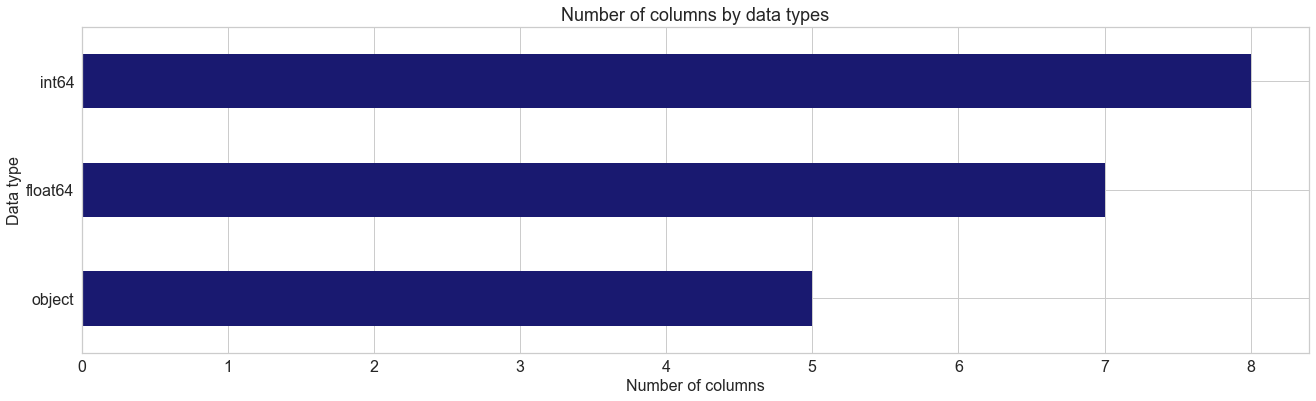

In [9]:
#FYI: COLOR NAMES: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
#https://towardsdatascience.com/churn-prediction-3a4a36c2129a

df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16,
                                           color="midnightblue")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

### Check the column names

In [10]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

**Numerical Data:**
- Tenure
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- SatisfactionScore
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

**Categorical Data:**
- Churn *(Target Variable)*
- PreferredLoginDevice
- CityTier
- PreferredPaymentMode
- Gender
- PreferedOrderCat
- MaritalStatus
- Complain

### Summary Statistics

In [11]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### Pandas Profiling

In [12]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Notes from pandas profiling report:**

<img src="images/pandasprofile.png" width="800" height="400">

### Check for missing values

In [13]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


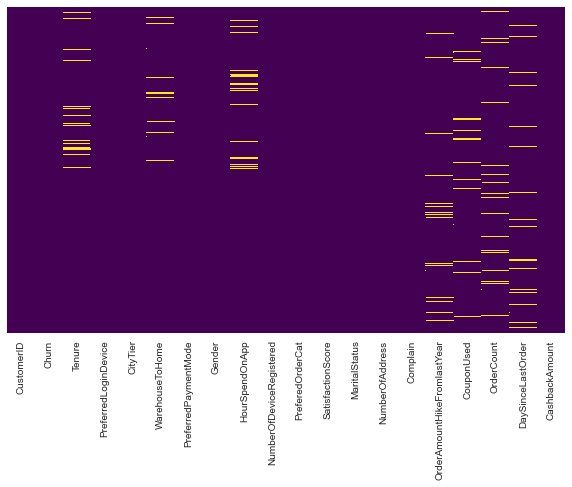

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

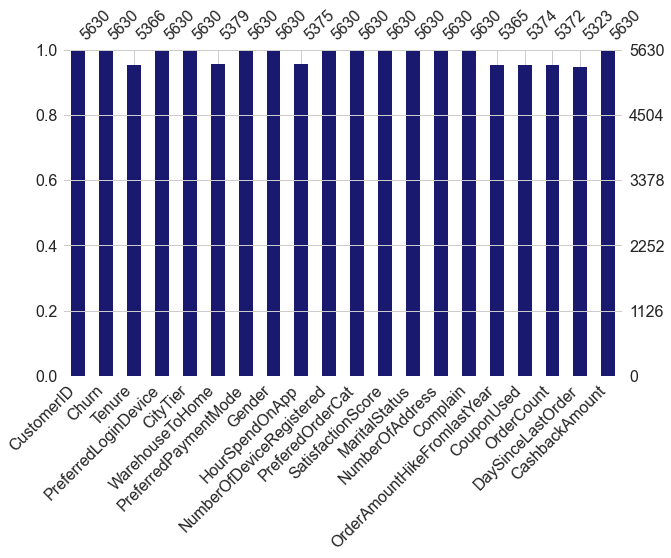

In [15]:
import missingno as msno
#msno.matrix(df.sample(500), figsize=(12,8))
msno.bar(df, figsize=(10,6), color='midnightblue')

### Target Variable

In [16]:
df['Churn'].unique()

array([1, 0], dtype=int64)

### Check the distribution of 'Churn'

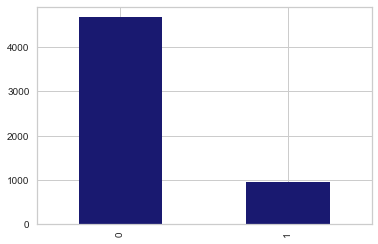

In [17]:
df['Churn'].value_counts().plot(kind='bar', color='midnightblue')

**NOTE: We see signs of imbalanced data**

### Correlations between predictors and target variable

**Drop 'CustomerID'** - It is an unnecessary variable

In [18]:
df = df.drop(['CustomerID'], axis=1)

In [19]:
corr = df.corr()['Churn'].sort_values()

# Display correlations
print('8 Positive Correlations:')
print('-----------------------------------')
print(corr.tail(8))
print('\n6 Negative Correlations:')
print('------------------------------')
print(corr.head(6))

8 Positive Correlations:
-----------------------------------
HourSpendOnApp              0.018675
NumberOfAddress             0.043931
WarehouseToHome             0.076630
CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

6 Negative Correlations:
------------------------------
Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154161
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
CouponUsed                    -0.008264
Name: Churn, dtype: float64


**NOTE: We can see that no predictors are highly correlated with the target**

### Explore the categorical variables

**Number of categories in each categorical variable**

In [20]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

**Explore the categories in each categorical variable further**

In [21]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [22]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [23]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [24]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [25]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

**NOTE: There are some duplicate categories that need to be combined in the following variables:**

- PreferredLoginDevice: 'Mobile Phone' and 'Phone'
- PreferredPaymentMode: 'Credit Card' and 'CC' & 'COD' and 'Cash on Delivery'
- PreferredOrderCat: 'Mobile Phone' and 'Mobile'

In [26]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone': 'Phone'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'Cash on Delivery':'COD'})

## B) Data Visualization

### Visualization of correlations between predictors and target variable

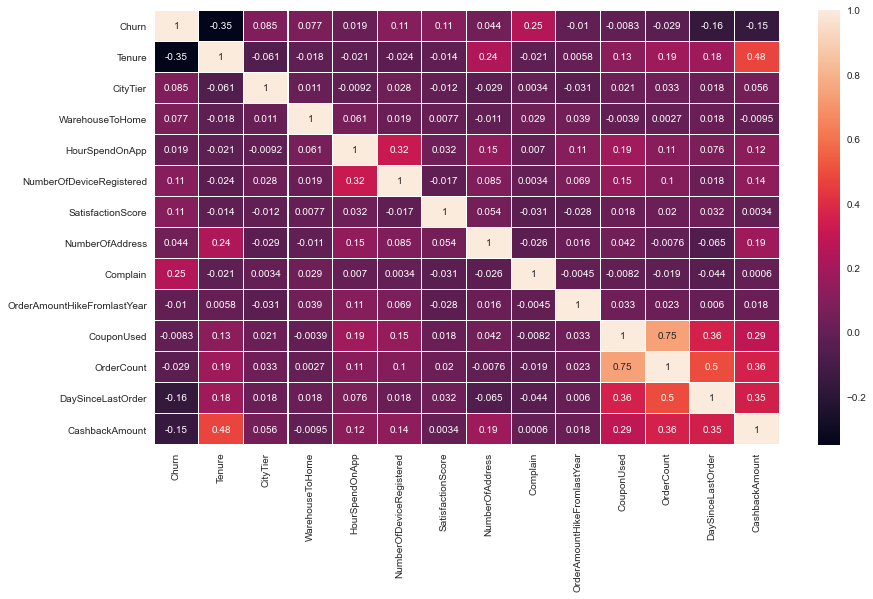

In [27]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

**NOTE: There is no multicollinearity between the variables. No correlation is above the threshold of 0.80**

### Visualization of all relationship between predictors 

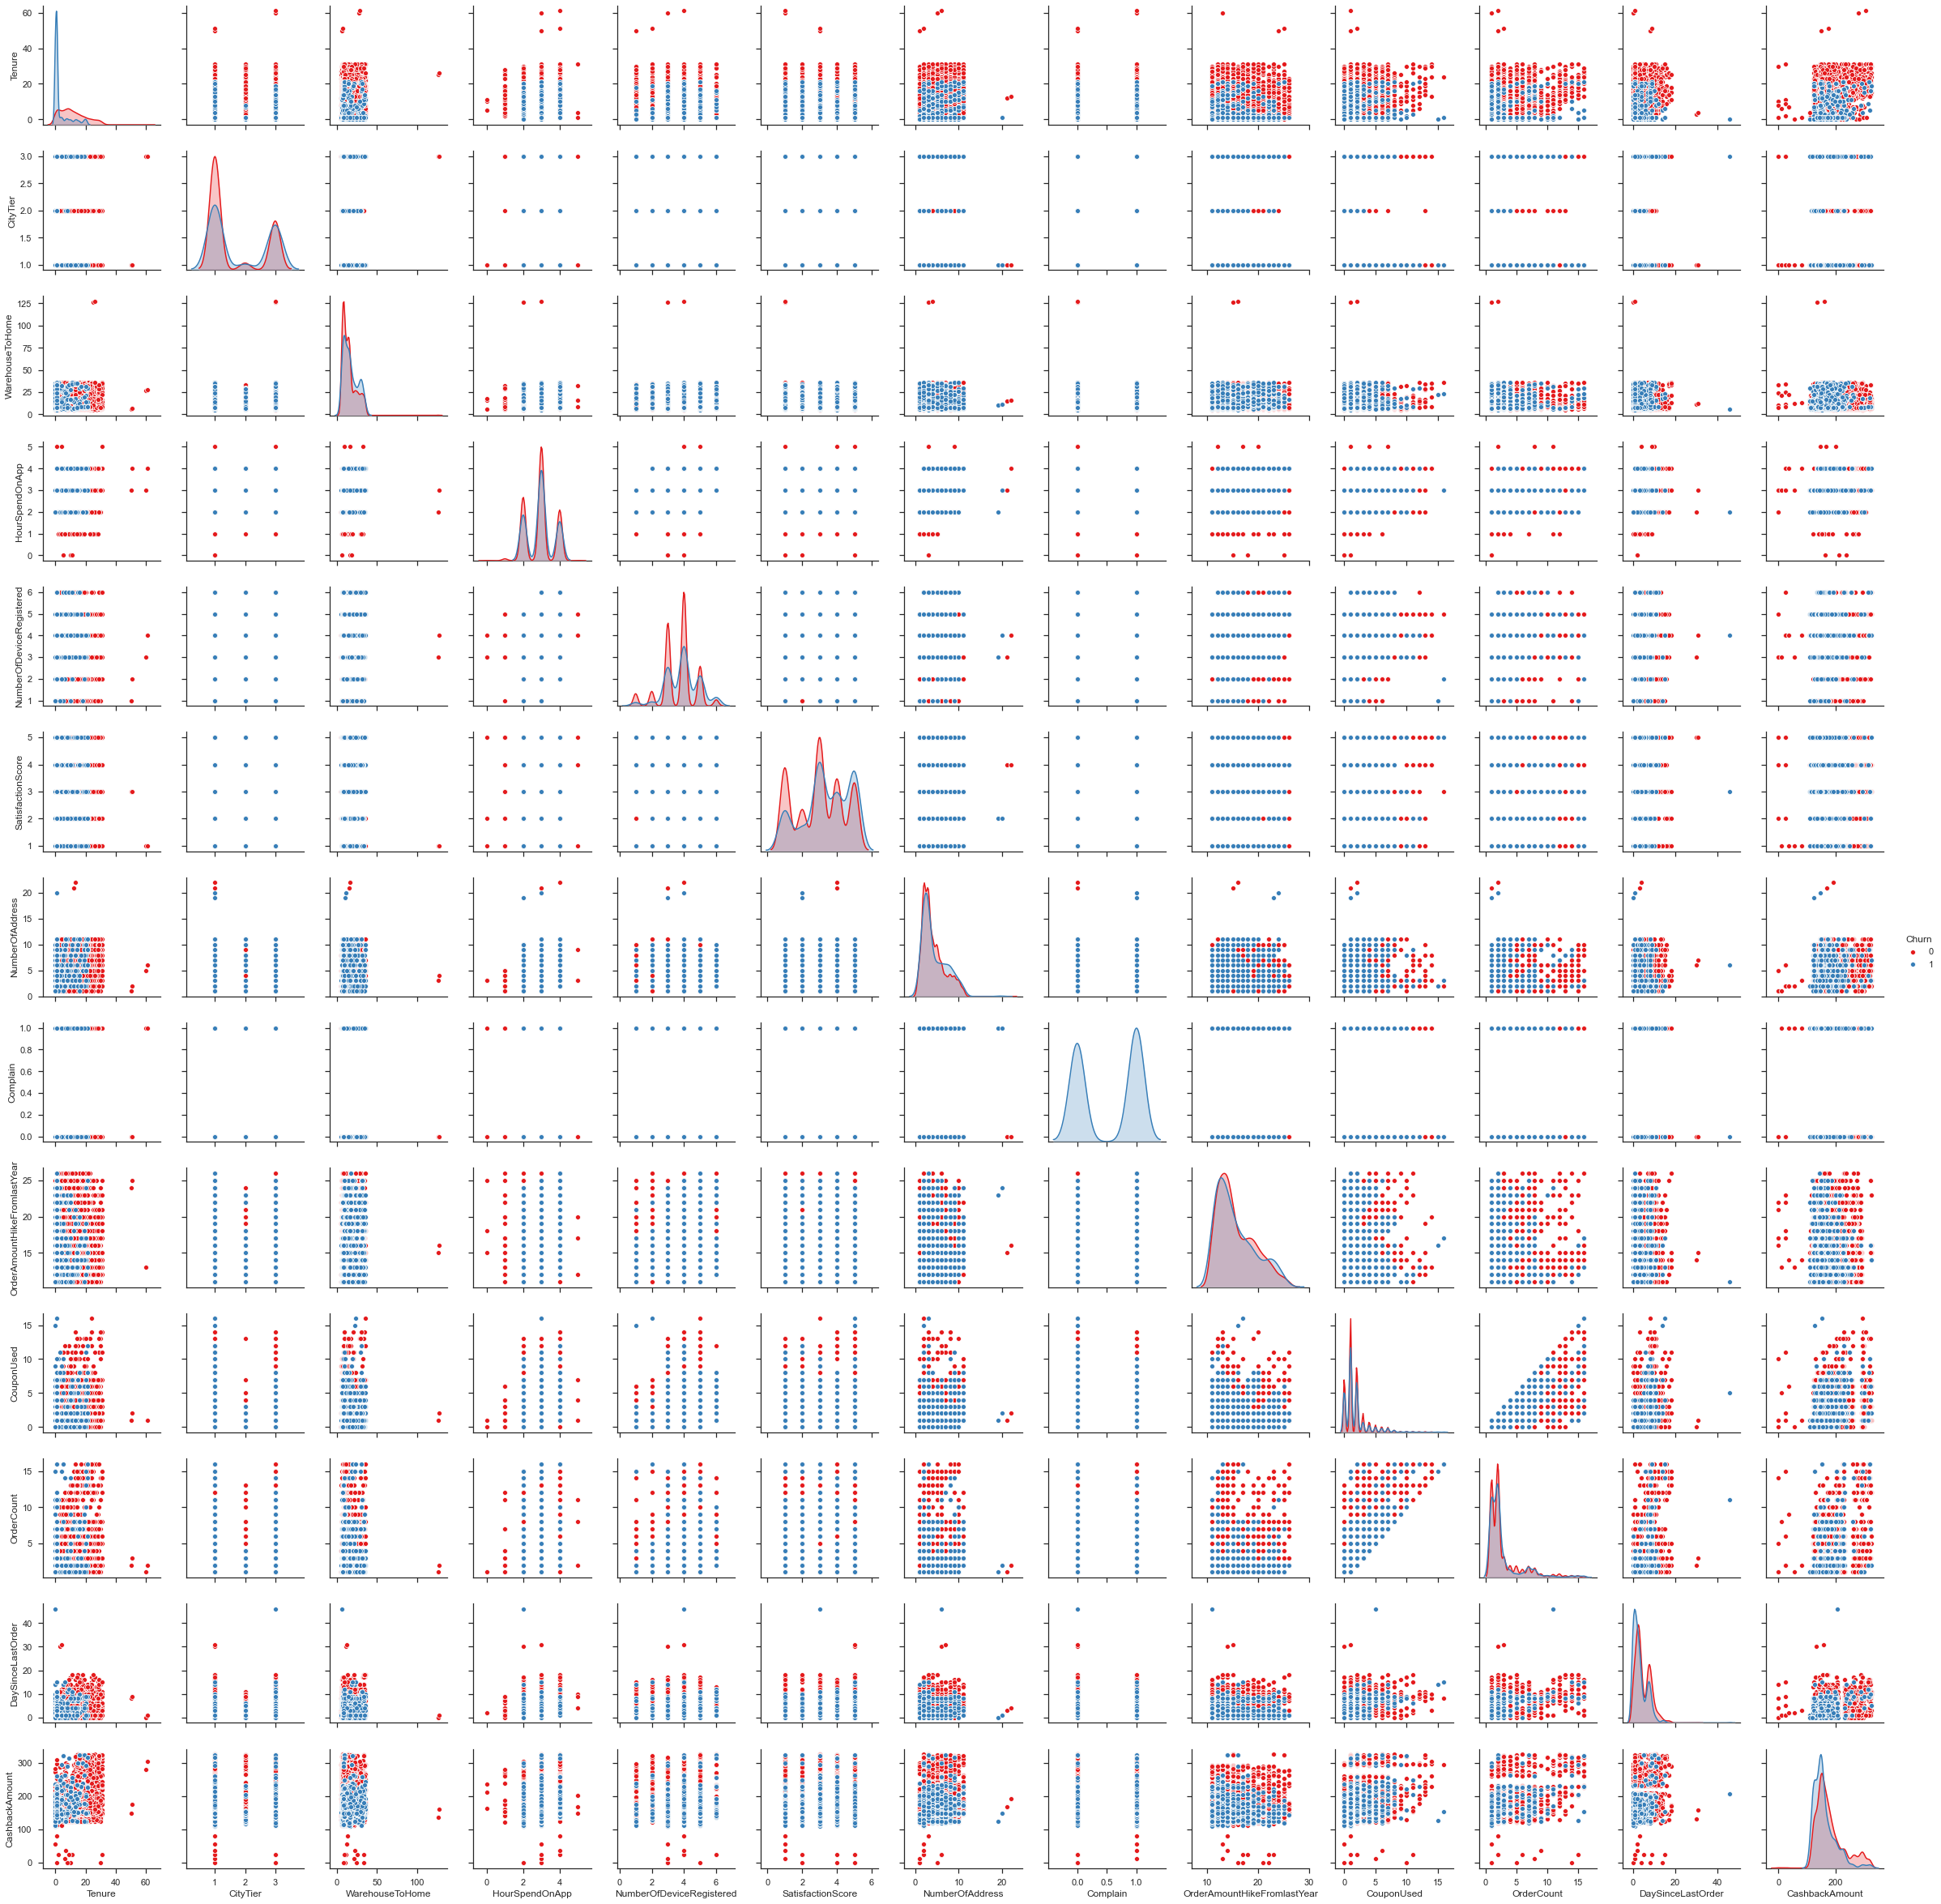

In [28]:
sns.set(style="ticks")

sns.pairplot(df, hue="Churn", palette="Set1")
plt.show()


### Relationship between predictors and Churn 

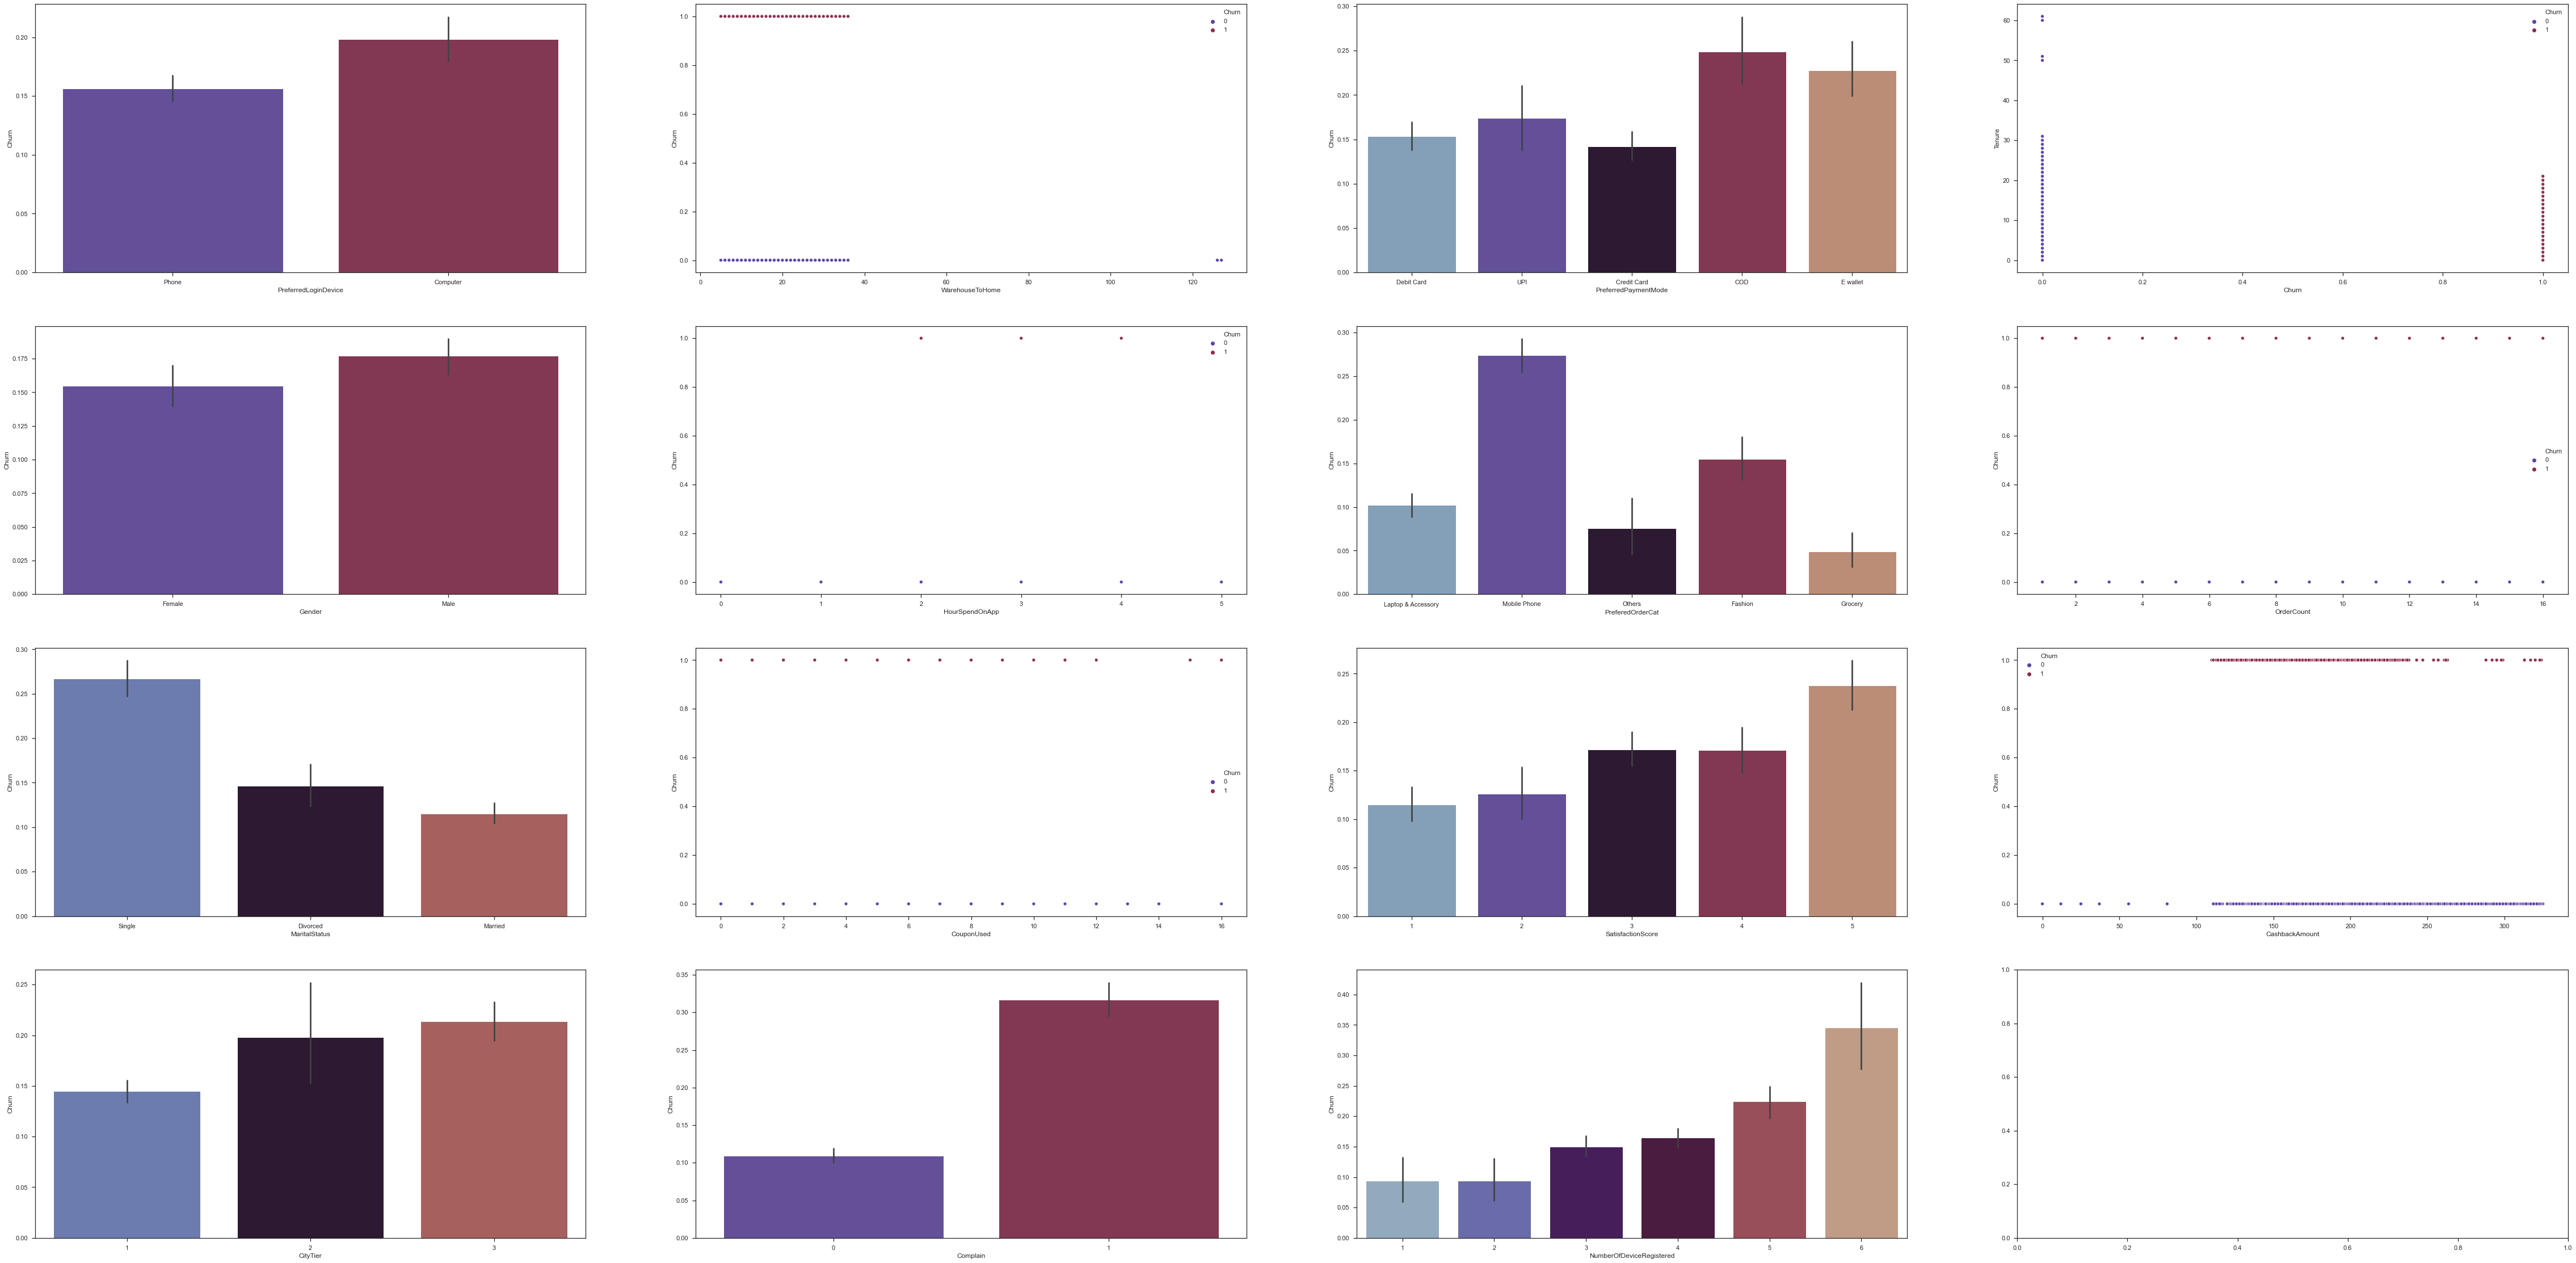

In [29]:
#FYI - Color palette names: https://python-graph-gallery.com/python-colors/

fig, axes = plt.subplots(4, 4, figsize=(80,40))
axes = axes.flatten()

ax = sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[0])
ax = sns.scatterplot(x ='WarehouseToHome', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[1])
ax = sns.barplot(x ='PreferredPaymentMode', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[2])
ax = sns.scatterplot(y ='Tenure', x ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[3])
ax = sns.barplot(x ='Gender', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[4])
ax = sns.scatterplot(x ='HourSpendOnApp', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[5])
ax = sns.barplot(x ='PreferedOrderCat', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[6])
ax = sns.scatterplot(x ='OrderCount', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[7])
ax = sns.barplot(x ='MaritalStatus', y ='Churn', data = df, palette = 'twilight', orient='v', ax=axes[8])
ax = sns.scatterplot(x ='CouponUsed', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[9])
ax = sns.barplot(x='SatisfactionScore', y='Churn', data=df, palette='twilight', orient='v', ax=axes[10])
ax = sns.scatterplot(x ='CashbackAmount', y ='Churn', hue='Churn', data = df, palette = 'twilight', ax=axes[11])
ax = sns.barplot(x='CityTier', y='Churn', data=df, palette='twilight', orient='v', ax=axes[12])
ax = sns.barplot(x='Complain', y='Churn', data=df, palette='twilight', orient='v', ax=axes[13])
ax = sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data=df, palette='twilight', orient='v', ax=axes[14])

**INSIGHTS:**

- *Gender:* Males are more likely to churn than females
- *CityTier:* Customers from CityTier 3 are most likely to churn
- *SatisfactionScore:* Interestingly, customers who gave a satisfaction score of 5 were the most likely to churn. This is something that should be further explored
- *PreferredPaymentMode:* Customers who paid cash on delivery are most likely to churn, so the payment system should be investigated

### Distribution of numerical variables

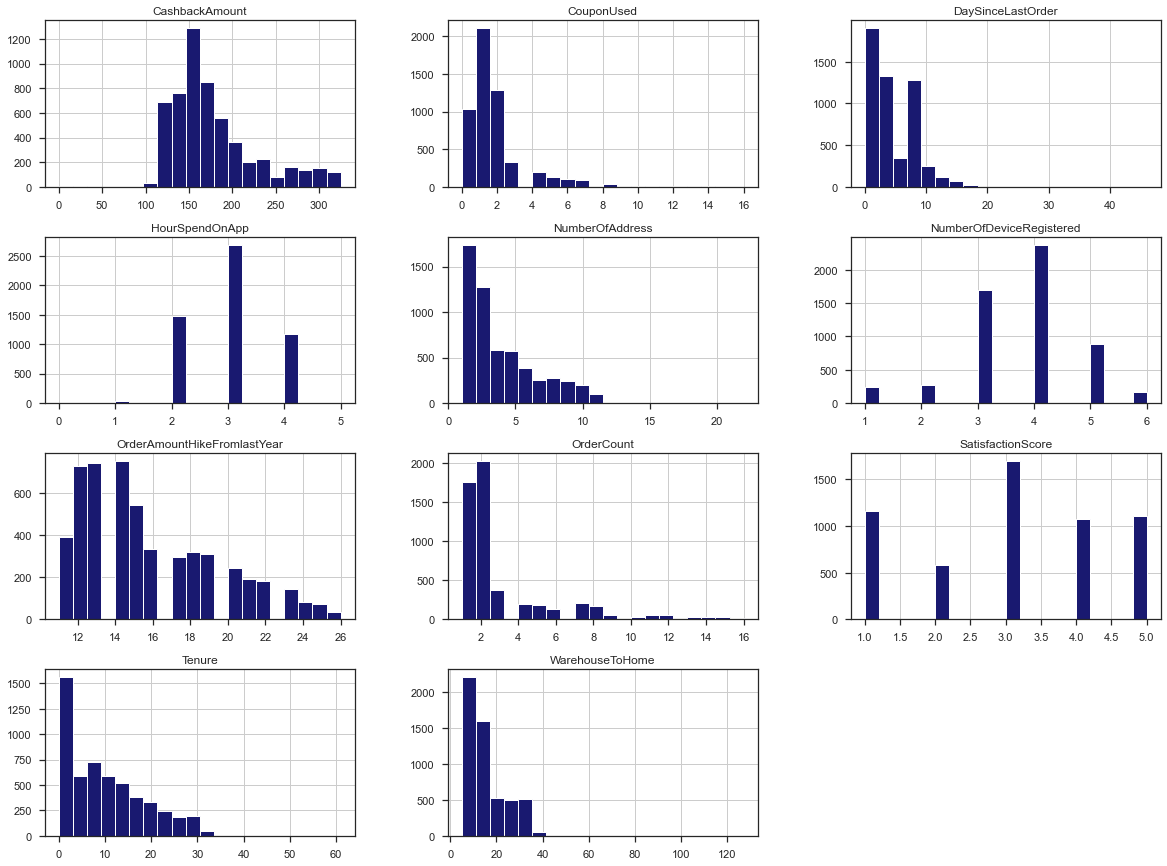

In [30]:
num_vars = df[['CashbackAmount','CouponUsed','DaySinceLastOrder','HourSpendOnApp','NumberOfAddress','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','OrderCount','SatisfactionScore','Tenure','WarehouseToHome']]

num_vars.hist(bins=20, figsize=(20,15), color='midnightblue')
plt.show();

**INSIGHTS:**

Positives:
- *DaysSinceLastOrder:* It is positive to see that most people do not wait long before ordering again
- *OrderAmountHikeFromLastYear:* A large number of customers have increased their spending by 14% which is good, and some increased by up to 25%

Negatives:

- *Tenure:* Most clients are only retained for a very short while
- *SatisfactionScore:* Most people give a score of 3 - this can be improved. 
- *HoursSpendonApp and OrderCount:* Customers spend quite a lot of time on the app (3 hours) but their order count is very low

### Distribution of Categorical Variables

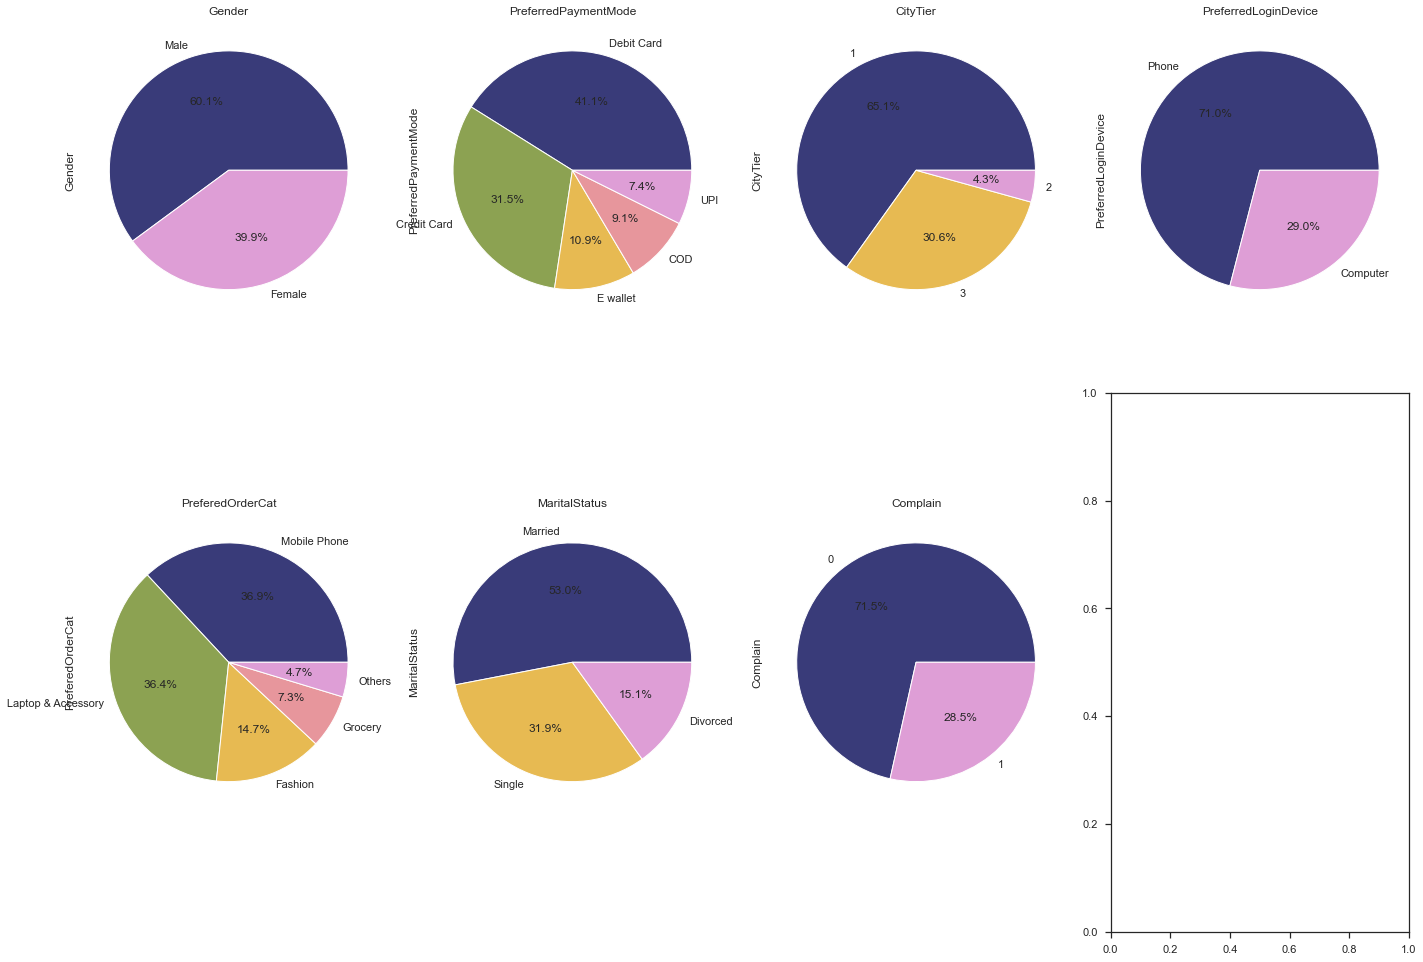

In [31]:
cat_vars = df[['Gender','PreferredPaymentMode','CityTier','PreferredLoginDevice','PreferedOrderCat','MaritalStatus','Complain']]
#cat_vars.columns

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20b')
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

**INSIGHTS:**

- *CityTier:* Last month, more clients from CityTier1 shopped, compared to other cities
- *PreferredOrderCat:* Clients shop most for Laptops and Mobile Phones compared to other categories
- *Complain:* Over 28% of clients had at least one complaint in the last month, which is not positive
- *PreferredLoginDevice:* Most customers access the platform via their phones, rather than their computers - so the mobile app should be optimized

### More insights

**Understanding characteristics of different Genders**

Gender is usually an important category in understanding customer behavior, so let's explore it further,

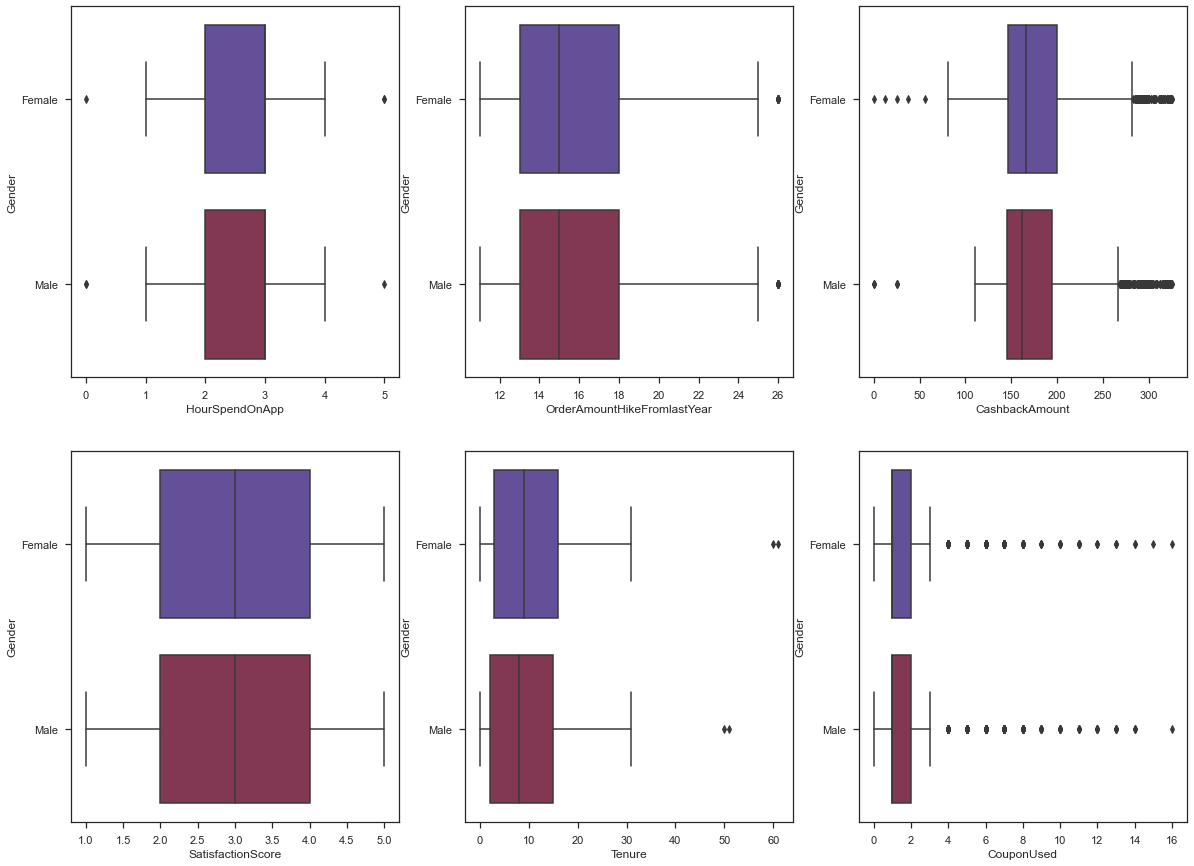

In [32]:
#gender vs hourssepndonapp

fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flatten()

ax = sns.boxplot(x='HourSpendOnApp',y='Gender',data=df,palette='twilight', ax=axes[0])
ax = sns.boxplot(x='OrderAmountHikeFromlastYear',y='Gender',data=df,palette='twilight', ax=axes[1])
ax = sns.boxplot(x='CashbackAmount',y='Gender',data=df,palette='twilight', ax=axes[2])
ax = sns.boxplot(x='SatisfactionScore',y='Gender',data=df,palette='twilight', ax=axes[3])
ax = sns.boxplot(x='Tenure',y='Gender',data=df,palette='twilight', ax=axes[4])
ax = sns.boxplot(x='CouponUsed',y='Gender',data=df,palette='twilight', ax=axes[5])


**INSIGHTS: Interestingly, across the board, there does not seem to be a significant difference in shopping behaviour between males and females in the dataset**

**Coupon vs Ordercount per Marital Status**

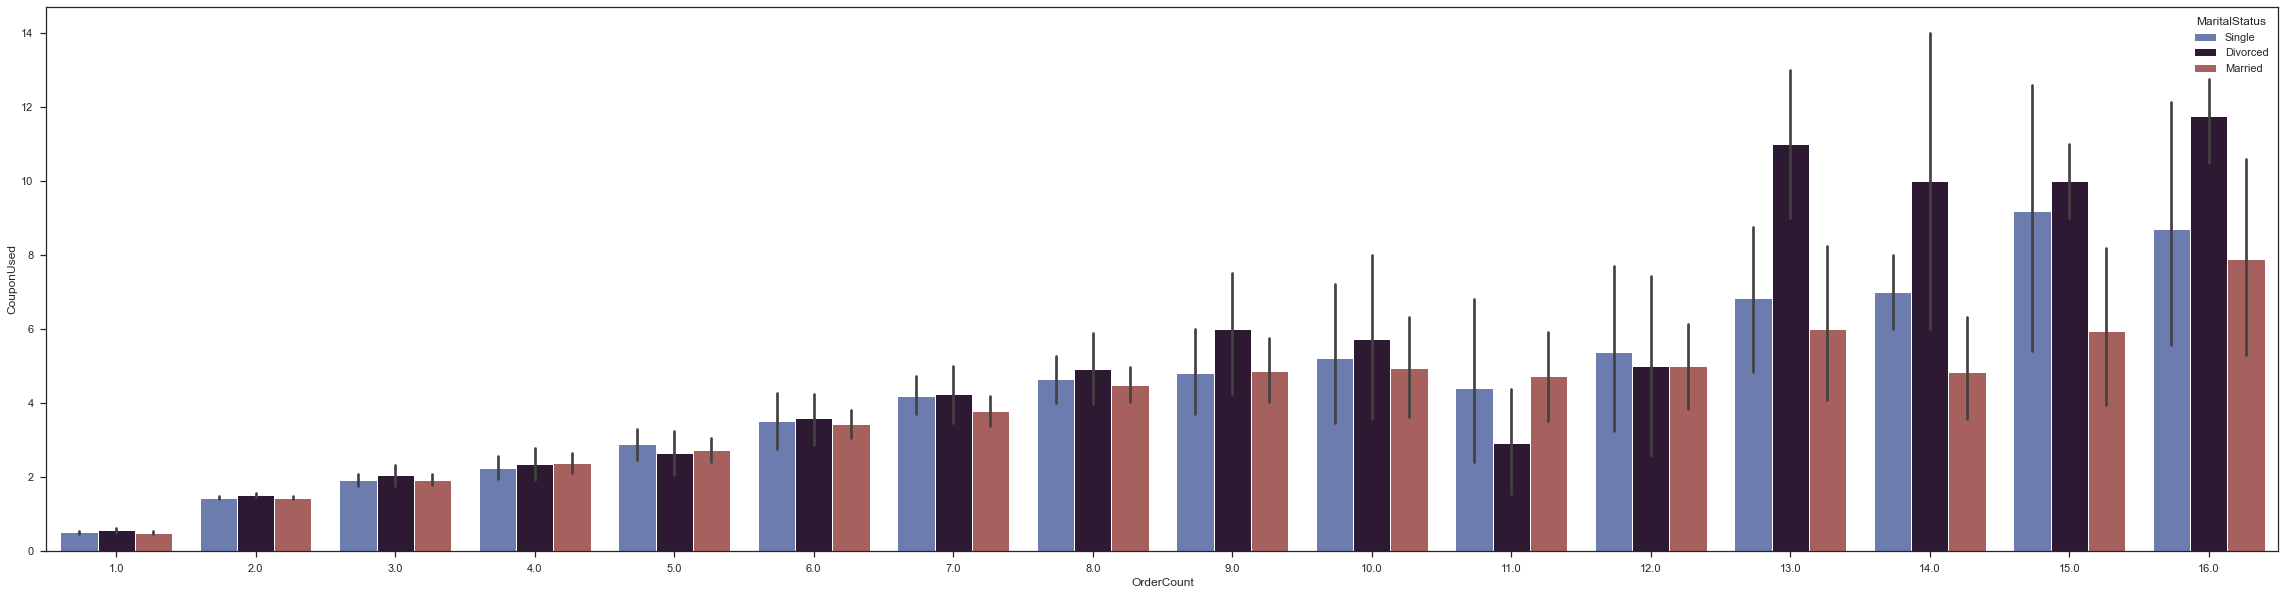

In [33]:
fig, axes = plt.subplots(figsize=(40,10))
sns.barplot(x="OrderCount", y="CouponUsed", data=df,hue='MaritalStatus',palette='twilight')

**INSIGHTS: As Order Count increases, so does the number of coupons used. Divorced customers use more coupons than single customers, and married customers use the least amount of coupons.**

### Initial Test of Hypotheses

#### Hypothesis 1: 
- *Tenure* - The longer the customer has been with the company, the less likely they are to churn.

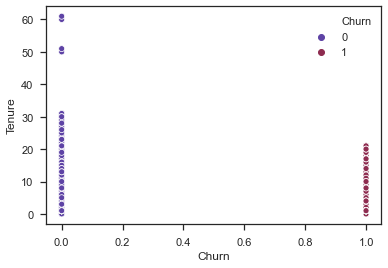

In [34]:
sns.scatterplot(y ='Tenure', x ='Churn', hue='Churn', data = df, palette = 'twilight')

The above plot shows that those who churn have a shorter tenure than those who do not churn. This fits with inuitive knowldge, and fits our hypothesis as well.

#### Hypothesis 2:
- *Complain* - If a customer lodged a complaint within the last month, this increases their likelihood to churn.

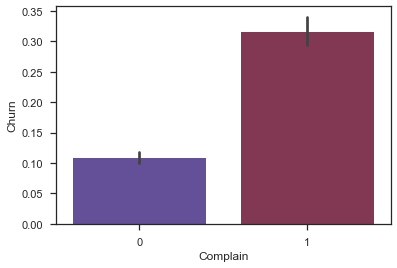

In [35]:
sns.barplot(x='Complain', y='Churn', data=df, palette='twilight', orient='v')

The above bar graph shows that more individuals who complain churn, than individuals who do not complain. This supports our hypothesis and warrants greater analysis. 

#### Hypothesis 3: 
- *CashbackAmount* - The greater the cashback amount, the less likely a customer is to churn

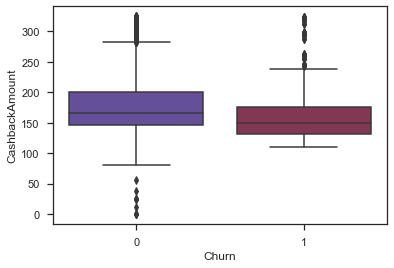

In [36]:
sns.boxplot(y='CashbackAmount',x='Churn',data=df,palette='twilight')  

The above boxplot shows that, on average, customers who churn received slightly less cashback in the last month that customers who were retained. This makes intuitive sense, and is compatible with our hypothesis.

#### Hypothesis 4: 
- *PreferredLoginDevice* - Customers who prefer to use the app on their mobile phone are less likely to churn compared to customers who prefer to log in on their computer because they have more/quicker access to the platform

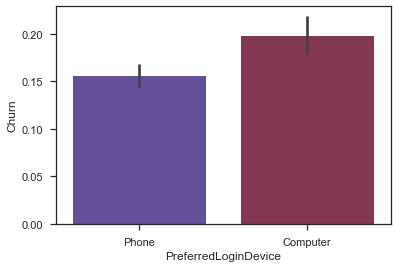

In [37]:
sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'twilight', orient='v')

As seen in the above bar graph, customers who log in through their mobile phones have lesser churns associated to them in comparison to computer log ins. This supports our hypothesis, and is worthy of further analysis.


**NOTE: Of course, these relationships are just correlations, and more analysis needs to be done to conclude if these differences are actually statistically significant.**

### C) Unsupervised Learning Analysis - Clustering

*Simulating new dataframe with some pre-processing for this analysis*

In [38]:
df1 = df
df1 = pd.get_dummies(df1, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
df1.columns
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

df1 = df1.rename(columns=clean_col)
df1.head()

df1['DaySinceLastOrder'] = df1['DaySinceLastOrder'].fillna(df1['DaySinceLastOrder'].median())
df1['OrderAmountHikeFromlastYear'] = df1['OrderAmountHikeFromlastYear'].fillna(df1['OrderAmountHikeFromlastYear'].median())
df1['Tenure'] = df1['Tenure'].fillna(df1['Tenure'].median())
df1['OrderCount'] = df1['OrderCount'].fillna(df1['OrderCount'].median())
df1['CouponUsed'] = df1['CouponUsed'].fillna(df1['CouponUsed'].median())
df1['HourSpendOnApp'] = df1['HourSpendOnApp'].fillna(df1['HourSpendOnApp'].median())
df1['WarehouseToHome'] = df1['WarehouseToHome'].fillna(df1['WarehouseToHome'].median())

df1.keys()

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'CityTier_1', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CreditCard',
       'PreferredPaymentMode_DebitCard', 'PreferredPaymentMode_Ewallet',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop&Accessory', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1'],
      dtype='object')

**PCA**

Text(0, 0.5, 'Second Principal Component')

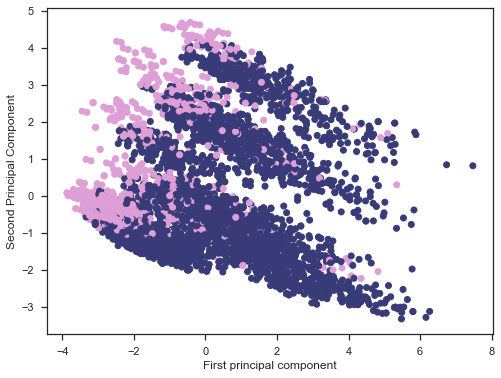

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Churn'],cmap='tab20b')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
#plt.legend(df1['Churn'])

In [40]:
pca.components_

array([[-0.1718612 ,  0.32029297,  0.01071033,  0.05966368,  0.06363187,
         0.00692079,  0.10770504, -0.00987534,  0.25181788,  0.31005086,
         0.29572665,  0.45137227, -0.04769346,  0.04769346, -0.13629495,
        -0.01556591,  0.14783026, -0.03686393, -0.02618204, -0.0189415 ,
         0.12829614, -0.03023257,  0.07198879, -0.07198879,  0.16148728,
         0.23331298,  0.05488364, -0.39698709,  0.22438101,  0.0361699 ,
         0.09029538, -0.12444252,  0.05426751, -0.05426751],
       [ 0.14201566, -0.16603695,  0.04040474, -0.04060904,  0.01194292,
        -0.0026093 , -0.05282488, -0.0302058 , -0.0644985 , -0.08697946,
        -0.06553863, -0.12238326,  0.03260424, -0.03260424, -0.51633952,
         0.004444  ,  0.53212652, -0.01485695, -0.15743315, -0.09615209,
         0.40729829, -0.00856656,  0.05751677, -0.05751677, -0.00061677,
        -0.10895897,  0.26971891, -0.14748585, -0.14222933,  0.00585326,
        -0.08216147,  0.08348427, -0.08669131,  0.08669131]])

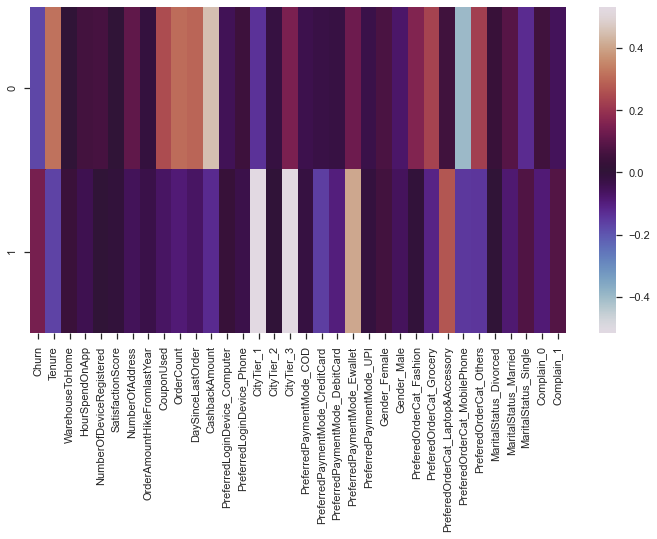

In [41]:
map= pd.DataFrame(pca.components_,columns=df1.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

PCA can be hard to interpret. This is why we used the above PCA analysis to translate into a heatmap that showcases the contribution of each variable to each principal component (1 and 2).

### Data Cleaning

**INFORMATION LEAKAGE**

We considered the possibility of *SatisfactionScore* leaking information into our model. However, after the exploratory analysis, we saw that there was no correlation between *SatisfactionScore* and *Churn*, so we have decided to keep the variable in our model.

# 4 - DATA PREPARATION

<img src="images/Pre-processing.png" width="800" height="400">

### TRAIN-TEST-VAL Split

We will split the data into Train, Test and Validation sets. When we pre-process, we will only use the train set so that we do not leak information to the test and validation sets.

train(70%) , test(30%) split

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

test(50%) val(50%) split

In [43]:
from sklearn.model_selection import train_test_split
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [44]:
print(len(train))
print(len(test))
print(len(val))

3941
844
845


### Fill in Missing Values


In [45]:
train.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1559,1,0.0,Phone,1,NaN,COD,Female,2.0,3,Mobile Phone,5,Single,6,1,11.0,0.0,1.0,4.0,127
993,0,NaN,Phone,1,9.0,Debit Card,Female,2.0,3,Mobile Phone,1,Married,2,0,21.0,1.0,1.0,0.0,121
1187,1,0.0,Phone,2,24.0,UPI,Male,NaN,1,Mobile Phone,5,Married,1,0,17.0,1.0,1.0,0.0,130
188,0,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Divorced,7,0,11.0,2.0,8.0,NaN,219
4630,0,1.0,Computer,3,31.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,2,0,14.0,2.0,3.0,2.0,149


**Fill missing values with median**

In [46]:
train['DaySinceLastOrder'] = train['DaySinceLastOrder'].fillna(train['DaySinceLastOrder'].median())
train['OrderAmountHikeFromlastYear'] = train['OrderAmountHikeFromlastYear'].fillna(train['OrderAmountHikeFromlastYear'].median())
train['Tenure'] = train['Tenure'].fillna(train['Tenure'].median())
train['OrderCount'] = train['OrderCount'].fillna(train['OrderCount'].median())
train['CouponUsed'] = train['CouponUsed'].fillna(train['CouponUsed'].median())
train['HourSpendOnApp'] = train['HourSpendOnApp'].fillna(train['HourSpendOnApp'].median())
train['WarehouseToHome'] = train['WarehouseToHome'].fillna(train['WarehouseToHome'].median())

In [47]:
# Re-check for missing values
miss_values_train = missing_values(train)

print(miss_values_train)

Dataframe has 19 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Categorical Encoding

None of the categorial variables have an ordinal relationship, so we will use One-Hot Encoding.

In [48]:
train.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [49]:
train = pd.get_dummies(train, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

In [50]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


In [51]:
train.dtypes

Churn                                    int64
Tenure                                 float64
WarehouseToHome                        float64
HourSpendOnApp                         float64
NumberOfDeviceRegistered                 int64
SatisfactionScore                        int64
NumberOfAddress                          int64
OrderAmountHikeFromlastYear            float64
CouponUsed                             float64
OrderCount                             float64
DaySinceLastOrder                      float64
CashbackAmount                           int64
PreferredLoginDevice_Computer            uint8
PreferredLoginDevice_Phone               uint8
CityTier_1                               uint8
CityTier_2                               uint8
CityTier_3                               uint8
PreferredPaymentMode_COD                 uint8
PreferredPaymentMode_Credit Card         uint8
PreferredPaymentMode_Debit Card          uint8
PreferredPaymentMode_E wallet            uint8
PreferredPaym

**Clean column names**

In [52]:
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

train = train.rename(columns=clean_col)

train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,0,1,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


### Correlations

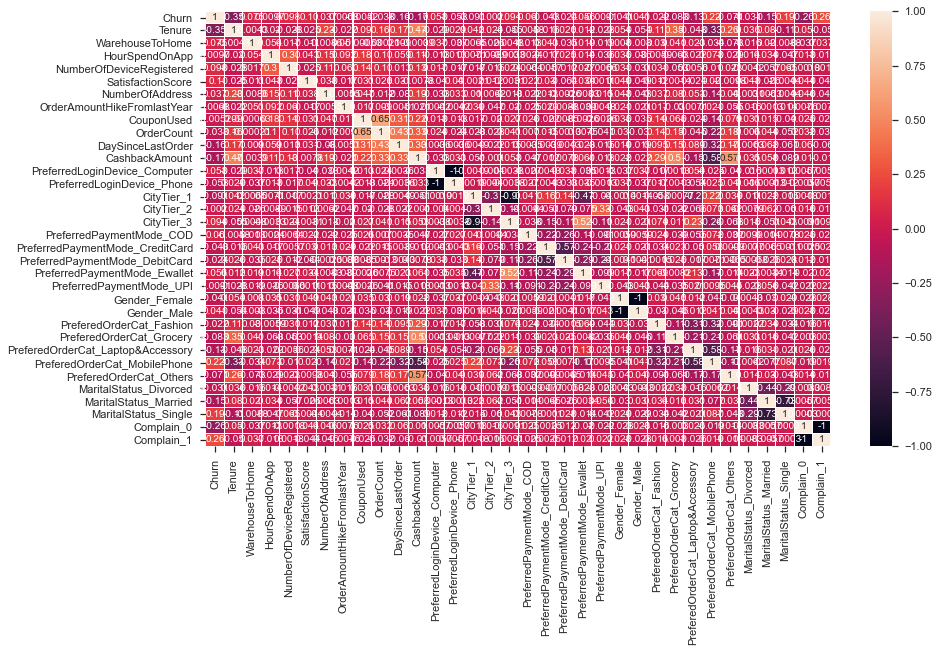

In [53]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(train.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

**INSIGHTS:**
- Negative correlation between Gender_Female and Gender_Male (-1) 
- Negative correlation between Complain_0 and Complain_1 (-1)
- Negative correlation between PreferredLoginDevice_Computer and PreferredLoginDevice_Phone (-1) 
- Negative correlation between CityTier_1 and CityTier_3 (0.9) 

In [54]:
corr_matrix = train.corr()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

CouponUsed                     OrderCount                      0.650843
CashbackAmount                 PreferedOrderCat_Others         0.573587
CityTier_3                     PreferredPaymentMode_Ewallet    0.519418
CashbackAmount                 PreferedOrderCat_Grocery        0.503235
Tenure                         CashbackAmount                  0.470031
                                                                 ...   
MaritalStatus_Married          MaritalStatus_Single           -0.731864
CityTier_1                     CityTier_3                     -0.902594
PreferredLoginDevice_Computer  PreferredLoginDevice_Phone     -1.000000
Gender_Female                  Gender_Male                    -1.000000
Complain_0                     Complain_1                     -1.000000
Length: 561, dtype: float64

**Remove Correlated Variables**

In [55]:
#drop complain_0, Gender_Male, and CityTier_3, PreferredLoginDevice_Computer
train = train.drop(['Complain_0','Gender_Male','CityTier_3', 'PreferredLoginDevice_Computer'], axis=1)

In [56]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,1,0,0,0,1,0,0,0,1,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,1,0,0,0,0,1,0,0,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,0,1,0,0,1,0,0


### Outlier Treatment

Find outliers on the train set

Text(0, 0.5, 'Values')

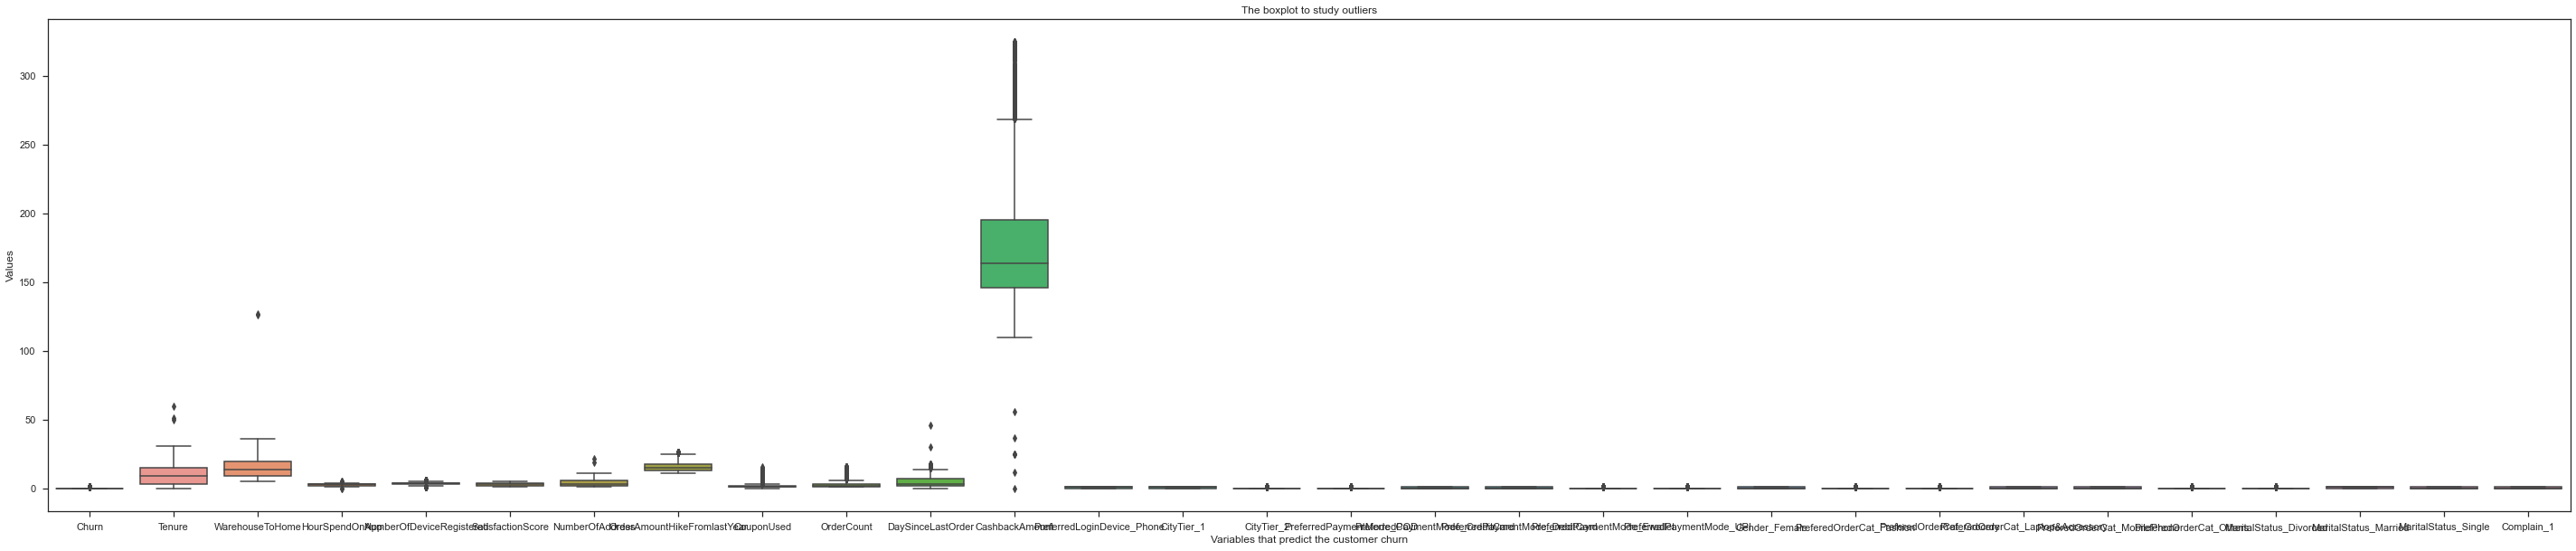

In [57]:
plt.figure(figsize=(50,10))
sns.boxplot(data=train)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

**INSIGHTS: Quite a lot of outliers, espcially with 'CashbackAmount'**

In [58]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
627,1,0.0,22.0,3.0,1,5,2,16.0,15.0,15.0,...,1,0,0,0,1,0,0,0,1,0
5035,0,18.0,36.0,3.0,4,1,3,26.0,7.0,14.0,...,0,0,0,1,0,0,0,0,1,0
869,0,25.0,34.0,2.0,1,3,3,11.0,0.0,2.0,...,1,0,1,0,0,0,1,0,0,1
2263,0,24.0,15.0,2.0,3,4,5,15.0,6.0,11.0,...,0,0,0,0,0,1,0,1,0,1
4600,1,1.0,30.0,3.0,4,5,11,16.0,2.0,2.0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,10.0,35.0,2.0,3,4,2,12.0,5.0,9.0,...,0,1,0,0,0,0,1,0,0,1
3748,1,1.0,31.0,3.0,5,4,2,24.0,3.0,11.0,...,1,0,0,1,0,0,0,0,1,1
3627,0,13.0,20.0,4.0,5,4,8,15.0,14.0,16.0,...,1,0,1,0,0,0,0,1,0,1
3645,0,29.0,9.0,3.0,6,3,6,15.0,6.0,10.0,...,1,0,0,0,0,1,1,0,0,0


**NOTE: Out of 3941 observations, there are 79 outliers. We will remove the outliers.**

In [59]:
train = train[~train.index.isin(values.index)]
train.shape


(3862, 30)

### Separate Features and Targets

Separate in train, test and val sets

In [60]:
y_train = train['Churn']
X_train = train.drop(columns=['Churn'])

In [61]:
X_train.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop&Accessory', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

### Feature Selection

**Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

,predictor,feature importance
24,PreferedOrderCat_Others,0.000802
21,PreferedOrderCat_Grocery,0.002991
13,CityTier_2,0.004784
25,MaritalStatus_Divorced,0.005904
18,PreferredPaymentMode_UPI,0.006093
20,PreferedOrderCat_Fashion,0.007206
14,PreferredPaymentMode_COD,0.011809
17,PreferredPaymentMode_Ewallet,0.012397
22,PreferedOrderCat_Laptop&Accessory,0.012605
16,PreferredPaymentMode_DebitCard,0.014364


**NOTE: We should remove the 6 predictors with the lowest importance score**



In [63]:
#drop most useless variables
X_train = X_train.drop(['PreferedOrderCat_Others','PreferedOrderCat_Grocery','CityTier_2','MaritalStatus_Divorced','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion'], axis=1)

In [64]:
X_train.shape

(3862, 23)

### Standardize the Data

In [65]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

### Pre-Process Validation Data

In [66]:
#Impute
val['DaySinceLastOrder'] = val['DaySinceLastOrder'].fillna(val['DaySinceLastOrder'].median())
val['OrderAmountHikeFromlastYear'] = val['OrderAmountHikeFromlastYear'].fillna(val['OrderAmountHikeFromlastYear'].median())
val['Tenure'] = val['Tenure'].fillna(val['Tenure'].median())
val['OrderCount'] = val['OrderCount'].fillna(val['OrderCount'].median())
val['CouponUsed'] = val['CouponUsed'].fillna(val['CouponUsed'].median())
val['HourSpendOnApp'] = val['HourSpendOnApp'].fillna(val['HourSpendOnApp'].median())
val['WarehouseToHome'] = val['WarehouseToHome'].fillna(val['WarehouseToHome'].median())

#categorical encoding
val = pd.get_dummies(val, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

#clean column names
def clean_col(name):
    return (name.strip().replace(" ", ""))
val = val.rename(columns=clean_col)

#drop correlated variables
val = val.drop(['Complain_0','Gender_Male','CityTier_3', 'PreferredLoginDevice_Computer'], axis=1)

#Separate Features and Target
y_val = val['Churn']
X_val = val.drop(columns=['Churn'])

#drop most useless variables
X_val = X_val.drop(['PreferedOrderCat_Others','PreferedOrderCat_Grocery','CityTier_2','MaritalStatus_Divorced','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion'], axis=1)

#standardize the data
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [67]:
X_val

array([[ 2.33030928, -0.8086994 ,  0.11359588, ...,  0.95940322,
        -0.69646358, -0.62983666],
       [-0.39853793, -0.03024754,  0.11359588, ...,  0.95940322,
        -0.69646358, -0.62983666],
       [-1.14276899,  0.74820432,  0.11359588, ..., -1.04231461,
        -0.69646358,  1.58771324],
       ...,
       [-0.15046091, -0.15998951,  1.5462603 , ...,  0.95940322,
        -0.69646358, -0.62983666],
       [-1.14276899,  1.13743025,  1.5462603 , ..., -1.04231461,
        -0.69646358, -0.62983666],
       [ 1.21396269, -0.8086994 ,  1.5462603 , ..., -1.04231461,
        -0.69646358, -0.62983666]])

### Baseline Model Classifier

In [68]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_std, y_train)

DummyClassifier()

Accuracy

In [69]:
dummy_clf.score(X_val, y_val)

0.7420118343195267

Precision

In [70]:
print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

[[588 127]
 [109  21]]


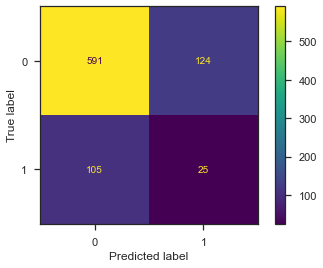

In [71]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dummy_clf, X_val, y_val)  
plt.show()  

In [72]:
print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.852     0.855       721
           1      0.177     0.185     0.181       124

    accuracy                          0.754       845
   macro avg      0.518     0.519     0.518       845
weighted avg      0.759     0.754     0.756       845



### Evaluation Metrics

**ROC Curves**

In [73]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**PR Curve**

In [74]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

**Classification Score**

In [75]:
def clf_score(clf, X_train, y_train, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

In [76]:
def clf_score_2(clf, X_test, y_test, train=False):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

**Classification Metrics**

In [77]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### Dealing with Imbalanced Data

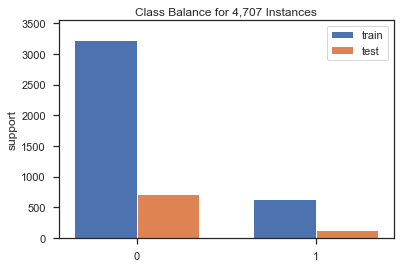

In [78]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()  

**NOTE:** The resulting figure allows us to diagnose the severity of the imbalance issue. In this figure we can see that the "0" class dominates the "1" class. 

### Oversampling

In [79]:
print('Before OverSampling, the shape of X: {}'.format(X_train_std.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (3862, 23)
Before OverSampling, the shape of y: (3862,) 

Before OverSampling, counts of label '1': 637
Before OverSampling, counts of label '0': 3225


In [80]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_sample(X_train_std, y_train)
#X_val_ros, y_val_ros = ros.fit_sample(X_val, y_val)
pd.Series(y_train_ros).value_counts()
#pd.Series(y_val_ros).value_counts()

1    3225
0    3225
Name: Churn, dtype: int64

In [81]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (6450, 23)
After OverSampling, the shape of y: (6450,) 

After OverSampling, counts of label '1': 3225
After OverSampling, counts of label '0': 3225


In [82]:
X_train_ros

array([[-1.20789724, -0.18141493, -1.3406144 , ..., -1.07701219,
         1.46631564,  1.60085309],
       [-0.12664116, -0.77566806, -1.3406144 , ...,  0.9284946 ,
        -0.6819814 , -0.62466694],
       [-1.20789724,  1.00709134,  0.08371925, ...,  0.9284946 ,
        -0.6819814 , -0.62466694],
       ...,
       [-1.20789724,  1.83904572,  0.08371925, ..., -1.07701219,
         1.46631564,  1.60085309],
       [ 0.83447536,  1.83904572,  1.5080529 , ..., -1.07701219,
         1.46631564,  1.60085309],
       [-1.08775768,  2.43329885,  1.5080529 , ..., -1.07701219,
         1.46631564, -0.62466694]])

**ANOTHER METHOD: SMOTE**

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_std, y_train)
pd.Series(y_train_sm).value_counts()

1    3225
0    3225
Name: Churn, dtype: int64

**Turning array into a dataframe**

In [84]:
train_X = X_train
cols = list(train_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['Churn']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_CreditCard,PreferredPaymentMode_DebitCard,PreferredPaymentMode_Ewallet,Gender_Female,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,MaritalStatus_Married,MaritalStatus_Single,Complain_1,Churn
0,-1.207897,-0.181415,-1.340614,-0.681710,1.407713,0.714654,-1.303165,-0.961153,-0.690547,-0.104587,...,-0.684020,-0.836108,-0.345572,1.242633,-0.766807,1.282656,-1.077012,1.466316,1.600853,1
1,-0.126641,-0.775668,-1.340614,-0.681710,-1.496835,-0.853301,1.479707,-0.389112,-0.690547,-1.239183,...,-0.684020,1.196018,-0.345572,1.242633,-0.766807,1.282656,0.928495,-0.681981,-0.624667,0
2,-1.207897,1.007091,0.083719,-2.651606,1.407713,-1.245290,0.366558,-0.389112,-0.690547,-1.239183,...,-0.684020,-0.836108,-0.345572,-0.804743,-0.766807,1.282656,0.928495,-0.681981,-0.624667,1
3,-0.487060,-0.537967,0.083719,-0.681710,0.681576,1.106642,-1.303165,0.182929,1.886515,-0.388236,...,-0.684020,1.196018,-0.345572,1.242633,-0.766807,-0.779632,-1.077012,-0.681981,-0.624667,0
4,-1.087758,1.839046,0.083719,0.303237,-1.496835,-0.853301,-0.468304,0.182929,0.045757,-0.671885,...,1.461946,-0.836108,-0.345572,-0.804743,-0.766807,1.282656,0.928495,-0.681981,-0.624667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,-1.207897,0.412838,-1.340614,-0.681710,1.407713,-0.461312,0.366558,-0.961153,-0.690547,-0.671885,...,1.461946,-0.836108,-0.345572,-0.804743,1.304109,-0.779632,0.928495,-0.681981,-0.624667,1
6446,-0.847479,1.482494,0.083719,0.303237,-0.044561,-0.461312,-1.024878,-0.389112,-0.690547,-1.239183,...,-0.684020,-0.836108,2.893750,-0.804743,1.304109,-0.779632,-1.077012,-0.681981,1.600853,1
6447,-1.207897,1.839046,0.083719,-0.681710,-0.770698,-0.853301,2.314569,-0.389112,-0.690547,-0.955534,...,-0.684020,1.196018,-0.345572,-0.804743,-0.766807,1.282656,-1.077012,1.466316,1.600853,1
6448,0.834475,1.839046,1.508053,0.303237,1.407713,1.498631,-0.468304,0.754970,0.045757,-0.388236,...,-0.684020,1.196018,-0.345572,-0.804743,-0.766807,-0.779632,-1.077012,1.466316,1.600853,1


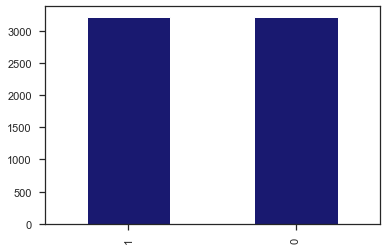

In [85]:
scaled_train_df['Churn'].value_counts().plot(kind='bar', color='midnightblue')

**NOTE: The target variable is now balanced**

# 3 - MODELLING


### Dummy Classifier

In [86]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)



DummyClassifier()

Validation Result:

accuracy score: 0.4793



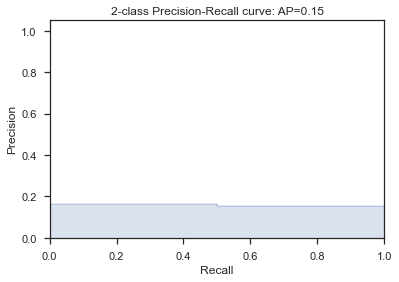

roc auc score: 0.5402097902097902



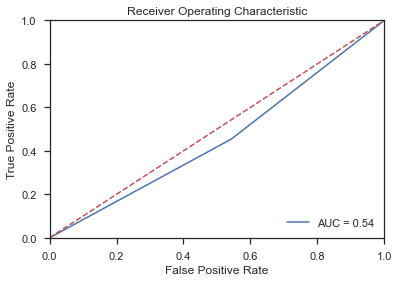

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.48      0.61       715
           1       0.16      0.54      0.25       130

    accuracy                           0.49       845
   macro avg       0.51      0.51      0.43       845
weighted avg       0.74      0.49      0.56       845


Confusion Matrix: 
 [[352 363]
 [ 62  68]]

End of validation Result



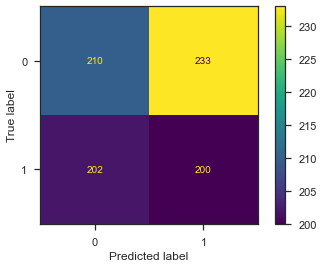

In [87]:
clf_score(clf_dummy, X_val, y_val, train=False)

### Logistic Regression

Validation Result:

accuracy score: 0.7645



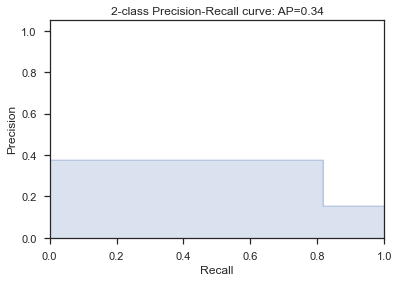

roc auc score: 0.7853146853146853



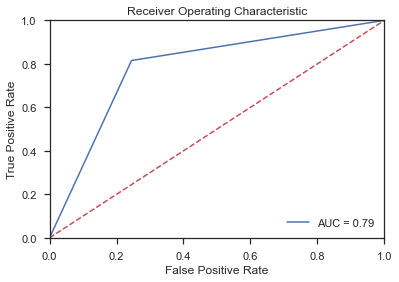

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.84       715
           1       0.38      0.82      0.52       130

    accuracy                           0.76       845
   macro avg       0.67      0.79      0.68       845
weighted avg       0.87      0.76      0.79       845


Confusion Matrix: 
 [[540 175]
 [ 24 106]]

End of validation Result



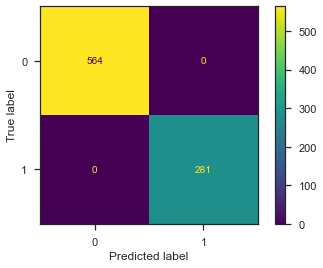

In [88]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_val, y_val, train=False)

In [89]:
#clf_log_reg.get_params()

### Random Forest

Validation Result:

accuracy score: 0.9586



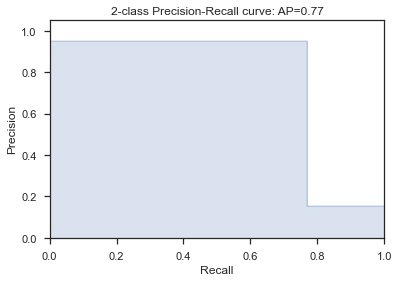

roc auc score: 0.8811188811188811



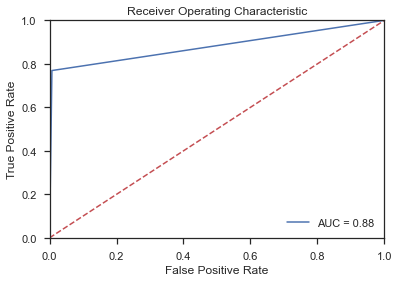

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       715
           1       0.95      0.77      0.85       130

    accuracy                           0.96       845
   macro avg       0.96      0.88      0.91       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[710   5]
 [ 30 100]]

End of validation Result



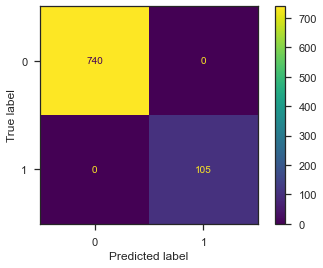

In [90]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_val, y_val,train=False)

In [91]:
#clf_rf.get_params()

### KNN

Validation Result:

accuracy score: 0.9432



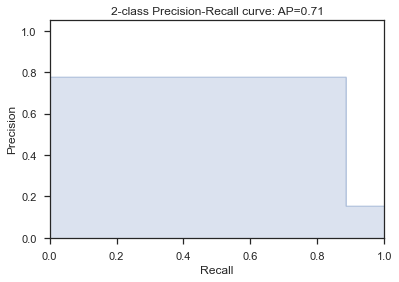

roc auc score: 0.9192307692307692



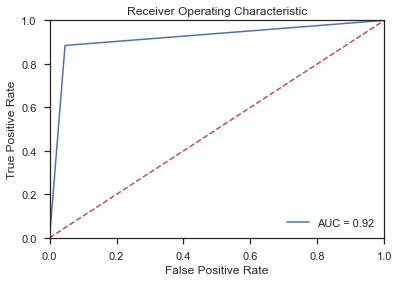

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       715
           1       0.78      0.88      0.83       130

    accuracy                           0.94       845
   macro avg       0.88      0.92      0.90       845
weighted avg       0.95      0.94      0.94       845


Confusion Matrix: 
 [[682  33]
 [ 15 115]]

End of validation Result



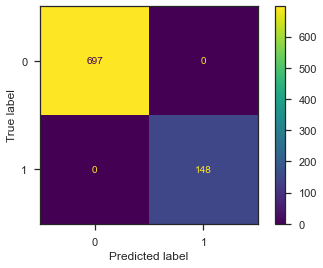

In [92]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_train_ros, y_train_ros)

clf_score(clf_knn, X_val, y_val, train=False)

In [93]:
#clf_knn.get_params()

### XGBoost

[23:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation Result:

accuracy score: 0.7976



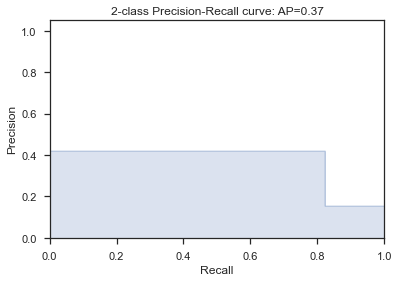

roc auc score: 0.808041958041958



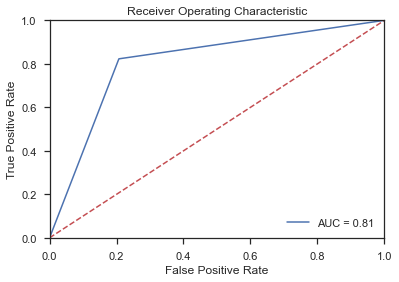

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       715
           1       0.42      0.82      0.56       130

    accuracy                           0.80       845
   macro avg       0.69      0.81      0.71       845
weighted avg       0.88      0.80      0.82       845


Confusion Matrix: 
 [[567 148]
 [ 23 107]]

End of validation Result



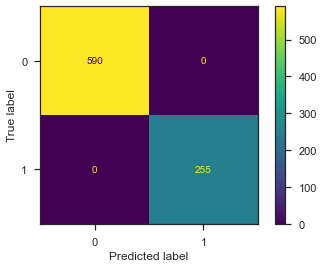

In [94]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_sm, y_train_sm)

clf_score(clf_xgb, X_val, y_val, train=False)

### AdaBoost

Validation Result:

accuracy score: 0.8426



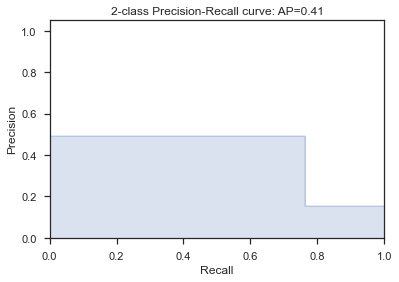

roc auc score: 0.8094405594405595



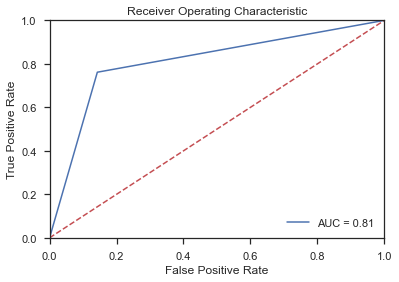

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       715
           1       0.49      0.76      0.60       130

    accuracy                           0.84       845
   macro avg       0.72      0.81      0.75       845
weighted avg       0.88      0.84      0.86       845


Confusion Matrix: 
 [[613 102]
 [ 31  99]]

End of validation Result



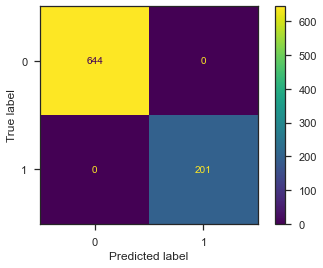

In [95]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train_ros, y_train_ros)

clf_score(clf_ada_boost, X_val, y_val,  train=False)

### CatBoost

0:	learn: 0.4954836	total: 168ms	remaining: 168ms
1:	learn: 0.4522742	total: 173ms	remaining: 0us
proba =  [[0.8076697  0.1923303 ]
 [0.8076697  0.1923303 ]
 [0.05428517 0.94571483]
 ...
 [0.89359996 0.10640004]
 [0.31723899 0.68276101]
 [0.8076697  0.1923303 ]]
Validation Result:

accuracy score: 0.8320



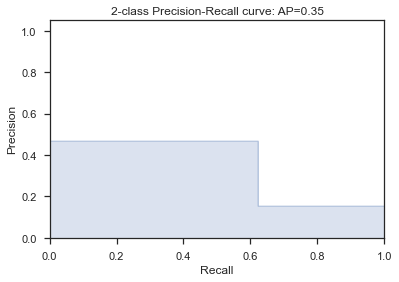

roc auc score: 0.7465034965034966



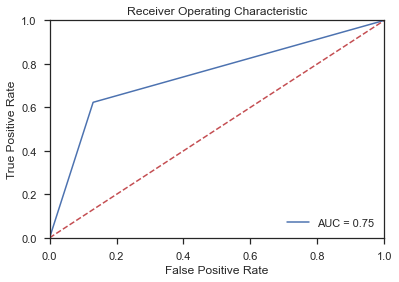

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       715
           1       0.47      0.62      0.53       130

    accuracy                           0.83       845
   macro avg       0.70      0.75      0.72       845
weighted avg       0.86      0.83      0.84       845


Confusion Matrix: 
 [[622  93]
 [ 49  81]]

End of validation Result



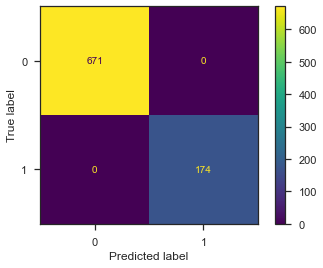

In [96]:
#!pip install catboost

from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_val)
preds_proba = clf_cat_boost.predict_proba(X_val)
#print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_val, y_val,  train=False)

### Multiple Layer Perceptron (ANN)

In [97]:
X_train_ros.shape

(6450, 23)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
6450/6450 [==============================] - 9s 1ms/step - loss: 0.5378 - accuracy: 0.7018
Epoch 2/3
6450/6450 [==============================] - 7s 1ms/step - loss: 0.3243 - accuracy: 0.8710
Epoch 3/3
27/27 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8544
[0.34417736530303955, 0.8544378876686096]


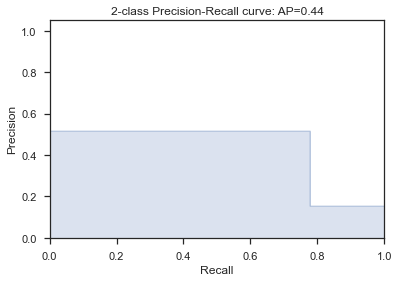

roc auc score: 0.8227272727272726



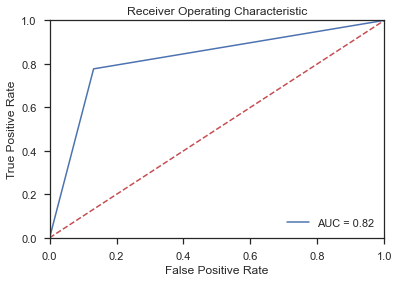

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       715
           1       0.52      0.78      0.62       130

    accuracy                           0.85       845
   macro avg       0.74      0.82      0.77       845
weighted avg       0.89      0.85      0.87       845


Confusion Matrix: 
 [[621  94]
 [ 29 101]]



In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(12, activation='relu', input_shape=(23,)))
mlp.add(Dense(8, activation= 'relu'))
mlp.add(Dense(1, activation='sigmoid'))

mlp.output_shape
mlp.summary()
mlp.get_config()
mlp.get_weights()

mlp.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

train_y = np.asarray(y_train_sm)
mlp.fit(X_train_sm, train_y, epochs=3, batch_size=1, verbose=1)

y_pred = mlp.predict_classes(X_val)

val_y = np.asarray(y_val)
score = mlp.evaluate(X_val, val_y, verbose=1)
print(score)

evaluation_metrics(y_val, y_pred)

**Stacked Ensemble**

In [99]:
#!pip install mlxtend
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import (
    StackingClassifier, 
)
clfs = [
    x() for x in [
        DecisionTreeClassifier,
        LogisticRegression,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier,
    ]
]
stack = StackingClassifier(
    classifiers=clfs,
    meta_classifier=LogisticRegression(),
)
kfold = model_selection.KFold(n_splits=10, random_state=42)
s = model_selection.cross_val_score(stack, X_train, y_train, scoring="roc_auc", cv=kfold)
t = model_selection.cross_val_score(stack, X_train, y_train, scoring="accuracy", cv=kfold)
print(f"{stack.__class__.__name__}  "
      f"AUC: {s.mean():.3f}  STD: {s.std():.2f}")
print(f"{stack.__class__.__name__}  "
      f"ACC: {t.mean():.3f}  STD: {t.std():.2f}")

StackingClassifier  AUC: 0.949  STD: 0.02
StackingClassifier  ACC: 0.947  STD: 0.01


# 4 - MODEL SELECTION AND TUNING

### Compare Accuracy of Models

In [100]:
model_comparison = pd.DataFrame({'Model':['DummyClassifier','Logistic Regression','Random Forest','KNN','XGBoost','AdaBoost','CatBoost','ANN'],
                 'Accuracy': [accuracy_score(y_val, clf_dummy.predict(X_val)), accuracy_score(y_val, clf_log_reg.predict(X_val)), accuracy_score(y_val, clf_rf.predict(X_val)), 
                              accuracy_score(y_val, clf_knn.predict(X_val)), accuracy_score(y_val, clf_xgb.predict(X_val)), accuracy_score(y_val, clf_ada_boost.predict(X_val)), 
                              accuracy_score(y_val, clf_cat_boost.predict(X_val)), score[1]],
                 'AUC ROC': [roc_auc_score(y_val, clf_dummy.predict(X_val)), roc_auc_score(y_val, clf_log_reg.predict(X_val)), roc_auc_score(y_val, clf_rf.predict(X_val)),
                              roc_auc_score(y_val, clf_knn.predict(X_val)), roc_auc_score(y_val, clf_xgb.predict(X_val)), roc_auc_score(y_val, clf_ada_boost.predict(X_val)), 
                              roc_auc_score(y_val, clf_cat_boost.predict(X_val)), roc_auc_score(y_val, y_pred)]})

model_comparison


,Model,Accuracy,AUC ROC
0,DummyClassifier,0.506509,0.514685
1,Logistic Regression,0.764497,0.785315
2,Random Forest,0.958580,0.881119
3,KNN,0.943195,0.919231
4,XGBoost,0.797633,0.808042
5,AdaBoost,0.842604,0.809441
6,CatBoost,0.831953,0.746503
7,ANN,0.854438,0.822727


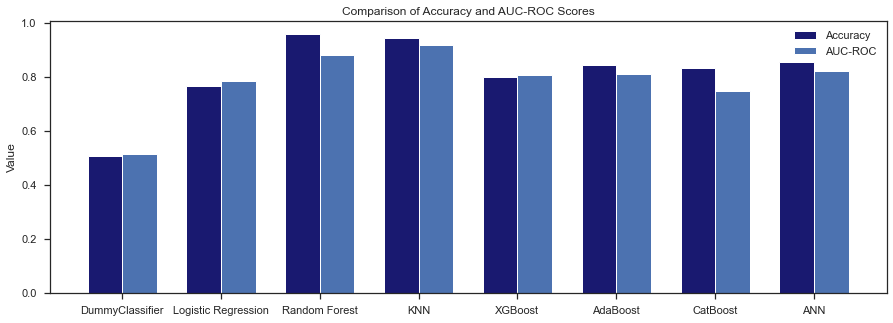

In [101]:
labels = model_comparison['Model']
acc = model_comparison['Accuracy']
auc = model_comparison['AUC ROC']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
bar1 = ax.bar(x - width/2, acc, width, label='Accuracy', color='midnightblue')
bar1 = ax.bar(x + width/2, auc, width, label='AUC-ROC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Comparison of Accuracy and AUC-ROC Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


**NOTE: *RANDOM FOREST* IS THE BEST PERFORMING MODEL**

### Feature Importance

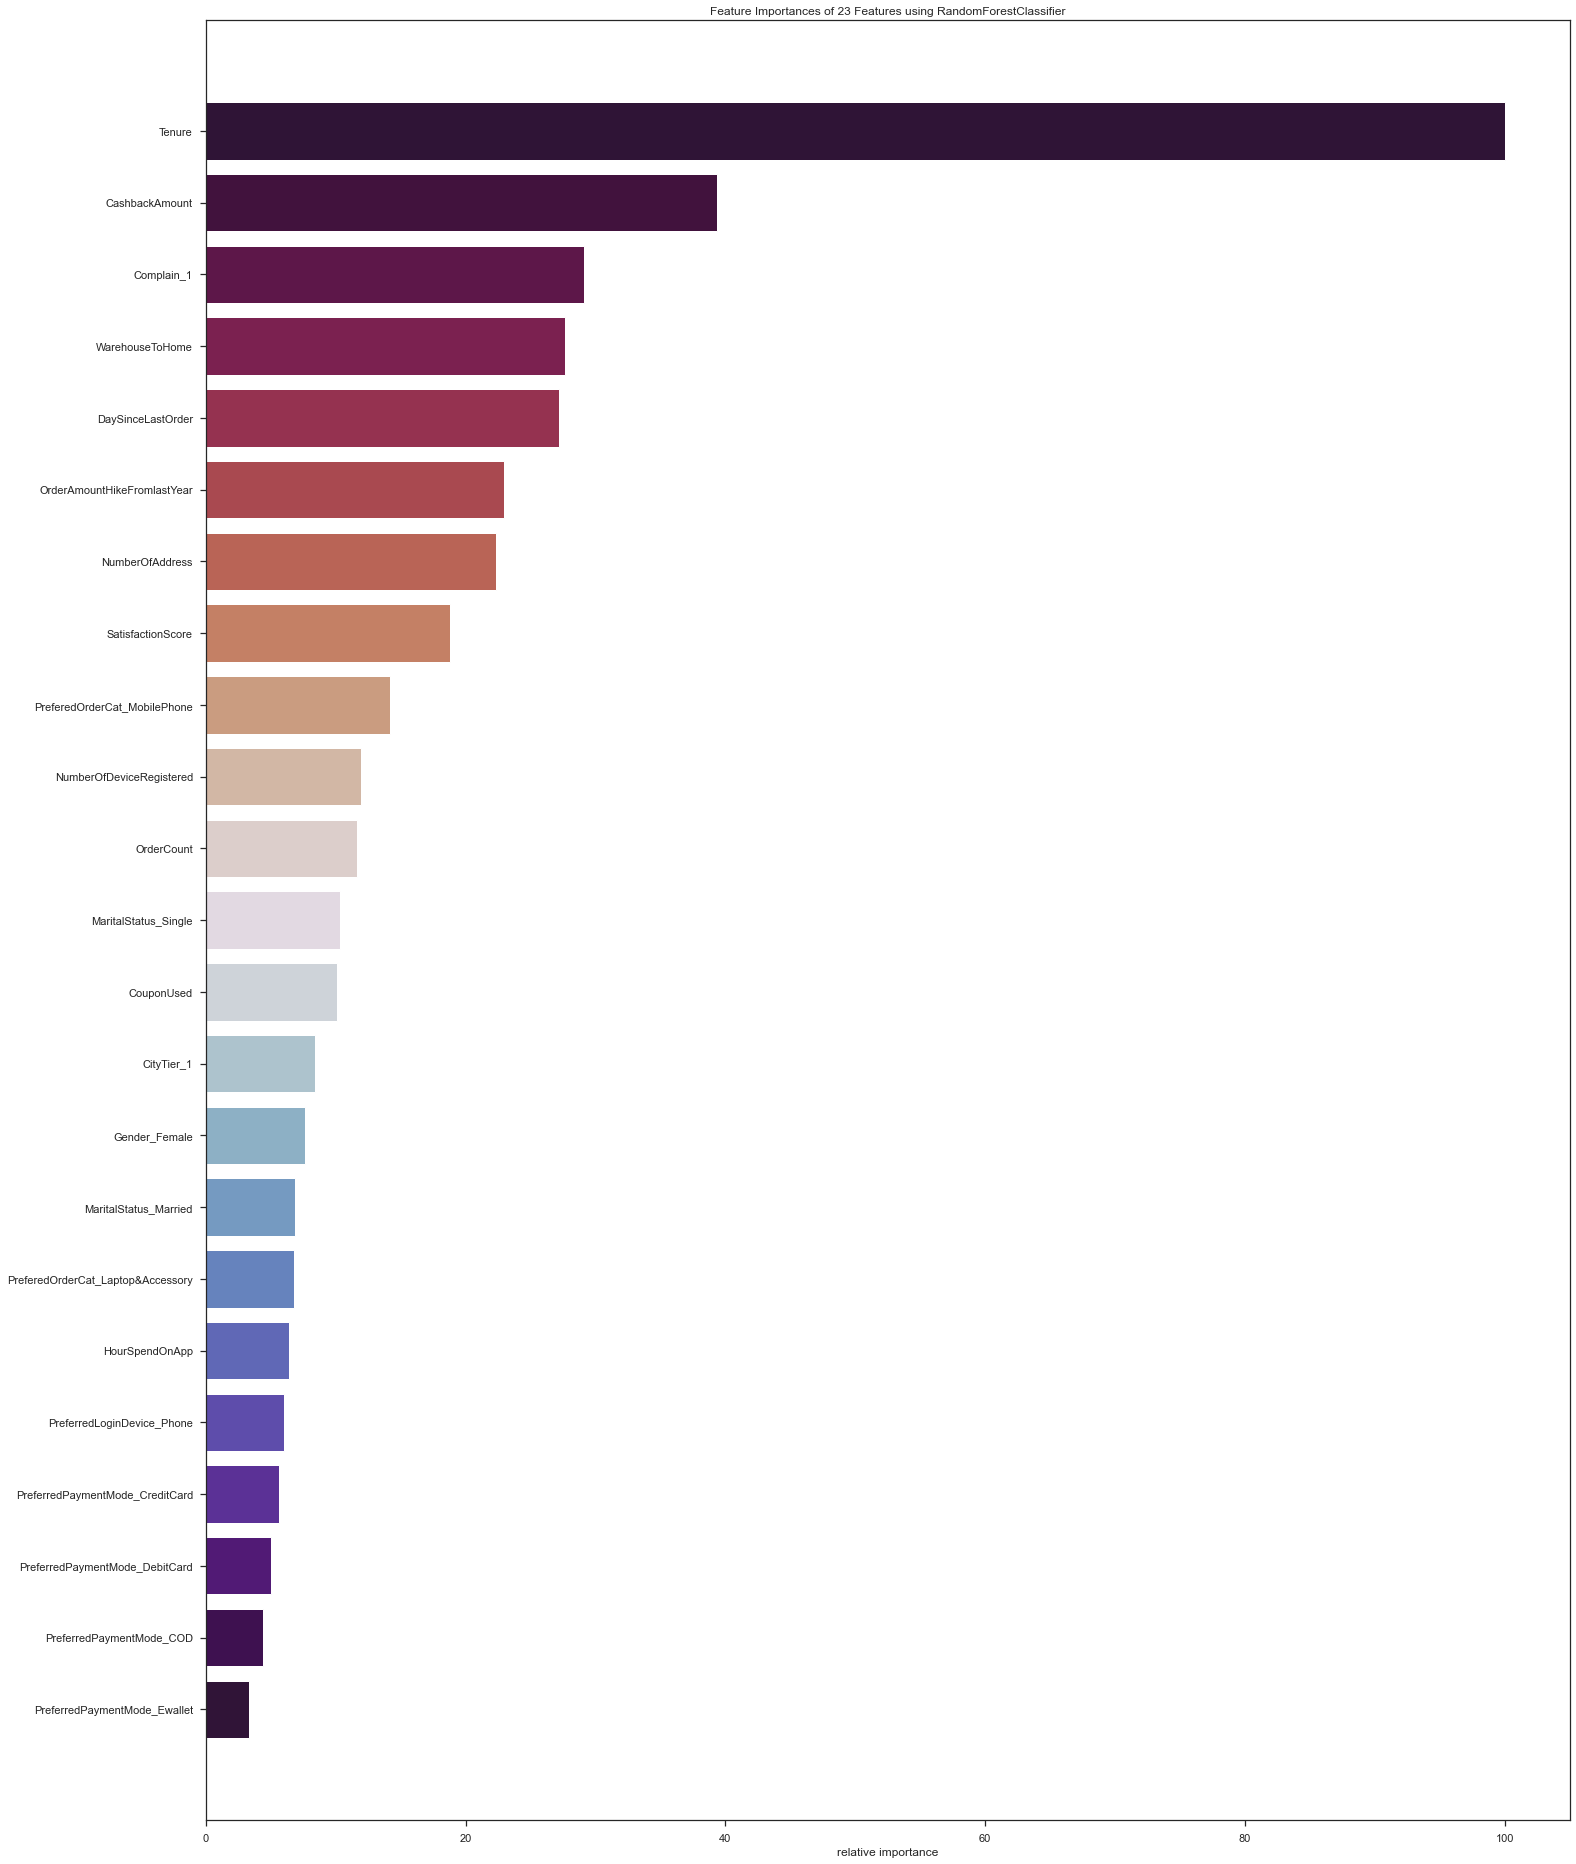

In [102]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(clf_rf, labels=X_train_ros.columns, colormap='twilight_shifted', rotation=180)
viz.fit(X_train_ros, y_train_ros)
viz.poof()

**TOP 5 FEATURES:**
- Tenure
- CashbackAmount
- WarehouseToHome
- Complain
- DaysSinceLastOrder

The feature importance plot also helpS up validate our hypotheses. We had hypothesized that tenue, cashback and complain were among the top features. 

### RandomSearch CV

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,5],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'warm_start': False, 'verbose': 0, 'random_state': 42, 'oob_score': <class 'bool'>, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}
0.9922477700813879


**Validation Curve**

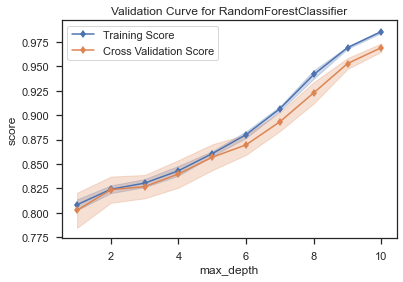

In [104]:
from yellowbrick.model_selection import (
 ValidationCurve,
)
fig, ax = plt.subplots(figsize=(6, 4))
vc_viz = ValidationCurve(
 RandomForestClassifier(n_estimators=100),
 param_name="max_depth",
 param_range=np.arange(1, 11),
 cv=10,
 n_jobs=-1,
)
vc_viz.fit(X_train_ros, y_train_ros)
vc_viz.poof()

**Learning Curve**

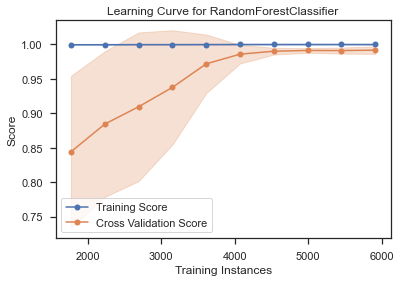

In [105]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    clf_rf,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X_train_ros, y_train_ros)
lc_viz.poof()

## 5 - Test Model with Test Set

**Use Best Hyperparameters for RF**

In [106]:
clf_rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 2,
        "n_estimators": 100,
        "random_state": 42,
        "n_jobs":-1,
    })
clf_rf_best.fit(X_train_ros, y_train_ros)
#clf_rf_best.score(X_test, y_test)

RandomForestClassifier(min_samples_leaf=2, n_jobs=-1, random_state=42)

### Pre-Process Test Data

In [107]:
#Impute
test['DaySinceLastOrder'] = test['DaySinceLastOrder'].fillna(test['DaySinceLastOrder'].median())
test['OrderAmountHikeFromlastYear'] = test['OrderAmountHikeFromlastYear'].fillna(test['OrderAmountHikeFromlastYear'].median())
test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())
test['OrderCount'] = test['OrderCount'].fillna(test['OrderCount'].median())
test['CouponUsed'] = test['CouponUsed'].fillna(test['CouponUsed'].median())
test['HourSpendOnApp'] = test['HourSpendOnApp'].fillna(test['HourSpendOnApp'].median())
test['WarehouseToHome'] = test['WarehouseToHome'].fillna(test['WarehouseToHome'].median())

#categorical encoding
test = pd.get_dummies(test, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

#clean column names
def clean_col(name):
    return (name.strip().replace(" ", ""))
test = test.rename(columns=clean_col)

#drop correlated variables
test = test.drop(['Complain_0','Gender_Male','CityTier_3', 'PreferredLoginDevice_Computer'], axis=1)

#separate features and target
y_test = test['Churn']
X_test = test.drop(columns=['Churn'])

#drop most useless variables
X_test = X_test.drop(['PreferedOrderCat_Others','PreferedOrderCat_Grocery','CityTier_2','MaritalStatus_Divorced','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion'], axis=1)

#standardize
X_test = sc.fit_transform(X_test)

In [108]:
X_test.shape

(844, 23)

### Test Model

Validation Result:

accuracy score: 0.9633



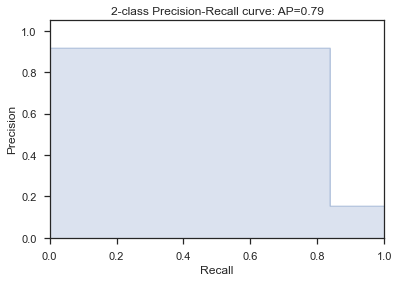

roc auc score: 0.9122377622377623



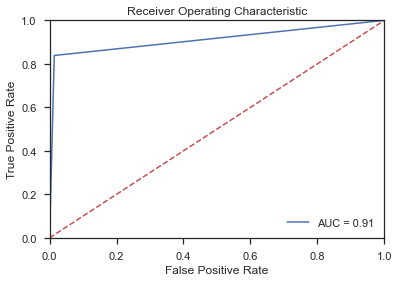

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       715
           1       0.92      0.84      0.88       130

    accuracy                           0.96       845
   macro avg       0.94      0.91      0.93       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[705  10]
 [ 21 109]]

End of validation Result



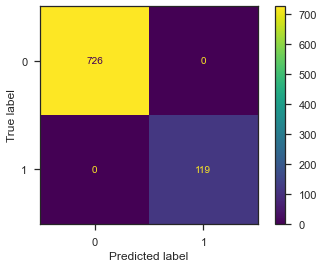

In [109]:
clf_score(clf_rf_best, X_test, y_test, train=False)

**Rather than getting a classification of 0 or 1, it would be interesting to get a probability score to measure the 'health' of the customer, and perhaps enable the company to catch at-risk customers earlieron before they are categorized as 'Churned'**

In [110]:
clf_rf.predict_proba(X_test)

array([[0.175, 0.825],
       [0.9  , 0.1  ],
       [0.975, 0.025],
       ...,
       [0.05 , 0.95 ],
       [1.   , 0.   ],
       [0.275, 0.725]])

# EXTRA

### Causal Inference

We see that *Tenure* is the most important feature - but does it have causal effect on the outcome?

**DoWhy**

In [111]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api

warnings.simplefilter(action='ignore')

In [112]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,1,0,0,0,1,0,0,0,1,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,1,0,0,0,1,0,0,1,0,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,1,0,0,0,0,1,0,0,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,0,1,0,0,1,0,0


In [113]:
train.columns

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop&Accessory', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

In [114]:
# define treatment and target

model=CausalModel(
        data = train,
        treatment=['Tenure'],
        outcome="Churn",
        common_causes = ['CashbackAmount','WarehouseToHome', 'Complain_1','DaySinceLastOrder','SatisfactionScore','HourSpendOnApp','OrderAmountHikeFromlastYear'])


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Tenure'] on outcome ['Churn']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


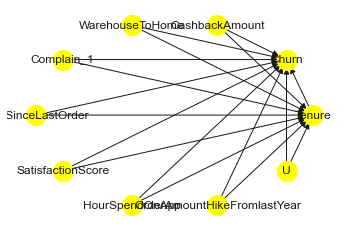

In [115]:
model.view_model(layout="dot")

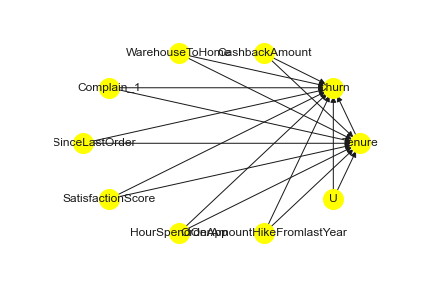

In [116]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identification**

In [117]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
    d                                                                         
─────────(Expectation(Churn|CashbackAmount,DaySinceLastOrder,WarehouseToHome,S
d[Tenure]                                                                     

                                                                        
atisfactionScore,OrderAmountHikeFromlastYear,HourSpendOnApp,Complain_1))
                                                                        
Estimand assumption 1, Unconfoundedness: If U→{Tenure} and U→Churn then P(Churn|Tenure,CashbackAmount,DaySinceLastOrder,WarehouseToHome,SatisfactionScore,OrderAmountHikeFromlastYear,HourSpendOnApp,Complain_1,U) = P(Churn|Tenure,CashbackAmount,DaySinceLastOrder,WarehouseToHome,SatisfactionScore,OrderAmountHikeFromlastYear,HourSpendOnApp,Complain_1)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand

In [118]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:b: Churn~Tenure+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Churn~Tenure+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Complain_1
Target units: ate

## Estimate
Mean value: -0.013861952795081234
p-value: [7.47678504e-77]

Causal Estimate is -0.013861952795081234


**NOTE: The ATE of Tenure on the outcome variable is negative (which is unexpected - more analysis should be done) and significant (which was expected)** 

**Refuting the estimate with a random common cause**

In [119]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:b: Churn~Tenure+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Complain_1+w_random
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


Refute: Add a Random Common Cause
Estimated effect:-0.013861952795081234
New effect:-0.013884625772975445



**NOTE: The ATE stays the same**

In [120]:
X = train[['Tenure','CashbackAmount','WarehouseToHome', 'Complain_1','DaySinceLastOrder','SatisfactionScore','HourSpendOnApp','OrderAmountHikeFromlastYear']]
ATE = dict()

for i in X:
    model = CausalModel(
        data = train,
        treatment = i,
        outcome = 'Churn',
        common_causes = list(X.drop(i, axis = 'columns').columns)
    )
    
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

    estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.linear_regression",
                                    test_significance = True)
    
    ATE[i] = estimate.value
    print(ATE)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Tenure'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:b: Churn~Tenure+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect th

{'Tenure': -0.013861952795081234}


INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:b: Churn~CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Tenure+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['WarehouseToHome'] on outcome ['Churn']


{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05}


INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:b: Churn~WarehouseToHome+CashbackAmount+DaySinceLastOrder+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Tenure+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Complain_1'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables

{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511}


INFO:dowhy.causal_estimator:b: Churn~Complain_1+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Tenure
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['DaySinceLastOrder'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511, 'Complain_1': 0.18924197025673284}


INFO:dowhy.causal_estimator:b: Churn~DaySinceLastOrder+CashbackAmount+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+HourSpendOnApp+Tenure+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['SatisfactionScore'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511, 'Complain_1': 0.18924197025673284, 'DaySinceLastOrder': -0.012037920589216461}


INFO:dowhy.causal_estimator:b: Churn~SatisfactionScore+CashbackAmount+DaySinceLastOrder+WarehouseToHome+OrderAmountHikeFromlastYear+HourSpendOnApp+Tenure+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['HourSpendOnApp'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:b: Churn~HourSpendOnApp+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+OrderAmountHikeFromlastYear+Tenure+Complain_1
INFO:dowhy.ca

{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511, 'Complain_1': 0.18924197025673284, 'DaySinceLastOrder': -0.012037920589216461, 'SatisfactionScore': 0.02895679655184996}
{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511, 'Complain_1': 0.18924197025673284, 'DaySinceLastOrder': -0.012037920589216461, 'SatisfactionScore': 0.02895679655184996, 'HourSpendOnApp': 0.00788680584052609}

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['OrderAmountHikeFromlastYear'] on outcome ['Churn']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]
INFO:dowhy.causal_estimator:b: Churn~OrderAmountHikeFromlastYear+CashbackAmount+DaySinceLastOrder+WarehouseToHome+SatisfactionScore+HourSpendOnApp+Tenure+Complain_1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator



{'Tenure': -0.013861952795081234, 'CashbackAmount': 2.0089701559339312e-05, 'WarehouseToHome': 0.002663305617330511, 'Complain_1': 0.18924197025673284, 'DaySinceLastOrder': -0.012037920589216461, 'SatisfactionScore': 0.02895679655184996, 'HourSpendOnApp': 0.00788680584052609, 'OrderAmountHikeFromlastYear': -0.0004642279512377945}


In [121]:
ATE_values = pd.Series(ATE).to_frame()
ATE_values = ATE_values.rename(columns={0: "ATE"})
ATE_values

,ATE
Tenure,-0.013862
CashbackAmount,0.000020
WarehouseToHome,0.002663
Complain_1,0.189242
DaySinceLastOrder,-0.012038
SatisfactionScore,0.028957
HourSpendOnApp,0.007887
OrderAmountHikeFromlastYear,-0.000464


**THE END! Thank You!** - Happy to receive any feedback you may have :)